In [1]:
# import shutil
# shutil.move ('C:/Users/i7B/Downloads/주민등록인구집계현황.csv','주민등록인구집계현황.csv')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
df=pd.read_csv('주민등록인구집계현황.csv',encoding='euc-kr')

In [4]:
df.head()

연도  월 행정구역구분명        행정구역명     총 인구수     0~9세   10~19세   20~29세   30~39세  \
0  2020  5       도        경기도    13324041  1169656  1341519  1788779  1916581   
1  2020  5      시군     경기도 가평군      62566     3529     4794     6194     5917   
2  2020  5     읍면동  경기도 가평군 가평읍     19619     1203     1738     2236     1970   
3  2020  5     읍면동   경기도 가평군 북면      3955      151      219      253      287   
4  2020  5     읍면동   경기도 가평군 상면      5545      167      331      515      375   

    40~49세  ...  10~19세 (여)  20~29세 (여)  30~39세 (여)  40~49세 (여)  50~59세 (여)  \
0  2294087  ...      650670      847756      930618     1128827     1092886   
1     8007  ...        2247        2673        2732        3695        5389   
2     2676  ...         795        1019         919        1258        1654   
3      417  ...          99         111         131         168         328   
4      567  ...         160         191         174         251         531   

   60~69세 (여)  70~79세 (여)  80~89세 (여)  90~99세 (여)  100세 이상 (여)  
0      731796      411182      215062       37971         3043  
1        5656        3610        2203         374           28  
2        1564        1068         663          95           13  
3         466         297         204          32            2  
4         636         360         235          42            1  

[5 rows x 40 columns]

In [5]:
df2=df[(df['행정구역구분명']=='시군')&(df['월']==5)&(df['연도']==2020)]

In [6]:
df2.head(50)

연도  월 행정구역구분명      행정구역명    총 인구수    0~9세  10~19세  20~29세  30~39세  \
1    2020  5      시군   경기도 가평군     62566    3529    4794    6194    5917   
8    2020  5      시군   경기도 고양시   1076179   84470  107211  151039  142786   
51   2020  5      시군   경기도 과천시     60790    4891    6362    8369    8324   
58   2020  5      시군   경기도 광명시    314413   25071   32134   40742   44448   
77   2020  5      시군   경기도 광주시    376753   35836   33608   44433   58846   
88   2020  5      시군   경기도 구리시    198883   15824   18658   27570   27198   
97   2020  5      시군   경기도 군포시    275902   21805   27437   38552   39338   
109  2020  5      시군   경기도 김포시    447038   52326   45686   48678   71424   
124  2020  5      시군  경기도 남양주시    706444   66483   77535   83689   90855   
142  2020  5      시군  경기도 동두천시     94097    6619    8807   11150   10350   
151  2020  5      시군   경기도 부천시    826093   60032   72698  118924  119007   
162  2020  5      시군   경기도 성남시    940519   70631   89441  132358  138313   
216  2020  5      시군   경기도 수원시   1192018  101337  121072  186965  182542   
265  2020  5      시군   경기도 시흥시    479368   46665   49454   66914   73832   
284  2020  5      시군   경기도 안산시    654047   45960   66242  105987   86210   
312  2020  5      시군   경기도 안성시    185018   14532   18502   21989   23259   
328  2020  5      시군   경기도 안양시    559792   41329   54169   79728   79077   
362  2020  5      시군   경기도 양주시    225069   19742   23861   26807   27492   
374  2020  5      시군   경기도 양평군    117456    7453    9679   10449   10978   
387  2020  5      시군   경기도 여주시    111234    7627    9751   12118   11769   
400  2020  5      시군   경기도 연천군     43689    2865    3239    5439    4318   
411  2020  5      시군   경기도 오산시    227749   24541   24851   30909   39553   
418  2020  5      시군   경기도 용인시   1070987  104156  123010  135480  148644   
457  2020  5      시군   경기도 의왕시    164150   13493   15012   23119   22856   
464  2020  5      시군  경기도 의정부시    454859   34836   43008   63215   59747   
479  2020  5      시군   경기도 이천시    217547   19516   22757   29489   30739   
494  2020  5      시군   경기도 파주시    455471   44568   48295   55586   66699   
513  2020  5      시군   경기도 평택시    522111   48483   52782   70912   78067   
537  2020  5      시군   경기도 포천시    148081    9002   12690   17941   14921   
552  2020  5      시군   경기도 하남시    281340   30103   24271   33753   48219   
567  2020  5      시군   경기도 화성시    834378  105931   94503  100281  150853   

     40~49세  ...  10~19세 (여)  20~29세 (여)  30~39세 (여)  40~49세 (여)  50~59세 (여)  \
1      8007  ...        2247        2673        2732        3695        5389   
8    184868  ...       52154       73822       72154       95404       97971   
51     9371  ...        3062        3957        4128        4888        5485   
58    54232  ...       15618       19433       21942       27356       26403   
77    65372  ...       16349       20954       28111       30748       30662   
88    33182  ...        8993       13503       13415       16677       18283   
97    45402  ...       13333       18401       18970       23093       24671   
109   82849  ...       22383       23424       36380       39741       31364   
124  129462  ...       37602       40098       46277       64225       56356   
142   14555  ...        4372        5093        5011        7078        7729   
151  131495  ...       35310       57523       57975       65311       76954   
162  158734  ...       43592       64475       68241       80296       78254   
216  204852  ...       58506       88350       87922      101628       98346   
265   87240  ...       23995       30592       34245       40530       39505   
284  110183  ...       32055       49685       39325       54234       61719   
312   30035  ...        8827        9897       10611       13988       14635   
328   90203  ...       26157       38287       38450       46146       51067   
362   38864  ...       11661       12411       13313       18857       17724   
374   16367  ...        4560        4701        5432  

In [7]:
df2.columns

Index(['연도', '월', '행정구역구분명', '행정구역명', '총 인구수', '0~9세', '10~19세', '20~29세',
       '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세',
       '100세 이상', '총 인구수 (남)', '0~9세 (남)', '10~19세 (남)', '20~29세 (남)',
       '30~39세 (남)', '40~49세 (남)', '50~59세 (남)', '60~69세 (남)', '70~79세 (남)',
       '80~89세 (남)', '90~99세 (남)', '100세 이상 (남)', '총 인구수 (여)', '0~9세 (여)',
       '10~19세 (여)', '20~29세 (여)', '30~39세 (여)', '40~49세 (여)', '50~59세 (여)',
       '60~69세 (여)', '70~79세 (여)', '80~89세 (여)', '90~99세 (여)', '100세 이상 (여)'],
      dtype='object')

In [8]:
df2=df2.set_index('행정구역명')

In [9]:
df2.index

Index(['경기도 가평군 ', '경기도 고양시 ', '경기도 과천시 ', '경기도 광명시 ', '경기도 광주시 ', '경기도 구리시 ',
       '경기도 군포시 ', '경기도 김포시 ', '경기도 남양주시 ', '경기도 동두천시 ', '경기도 부천시 ',
       '경기도 성남시 ', '경기도 수원시 ', '경기도 시흥시 ', '경기도 안산시 ', '경기도 안성시 ', '경기도 안양시 ',
       '경기도 양주시 ', '경기도 양평군 ', '경기도 여주시 ', '경기도 연천군 ', '경기도 오산시 ', '경기도 용인시 ',
       '경기도 의왕시 ', '경기도 의정부시 ', '경기도 이천시 ', '경기도 파주시 ', '경기도 평택시 ', '경기도 포천시 ',
       '경기도 하남시 ', '경기도 화성시 '],
      dtype='object', name='행정구역명')

In [10]:
df2[['총 인구수','총 인구수 (남)','총 인구수 (여)']]

총 인구수  총 인구수 (남)  총 인구수 (여)
행정구역명                                   
경기도 가평군      62566      32175      30391
경기도 고양시    1076179     527304     548875
경기도 과천시      60790      29872      30918
경기도 광명시     314413     155249     159164
경기도 광주시     376753     192894     183859
경기도 구리시     198883      98734     100149
경기도 군포시     275902     137001     138901
경기도 김포시     447038     224224     222814
경기도 남양주시    706444     351990     354454
경기도 동두천시     94097      46946      47151
경기도 부천시     826093     410257     415836
경기도 성남시     940519     465640     474879
경기도 수원시    1192018     600154     591864
경기도 시흥시     479368     250780     228588
경기도 안산시     654047     335253     318794
경기도 안성시     185018      95278      89740
경기도 안양시     559792     276997     282795
경기도 양주시     225069     114236     110833
경기도 양평군     117456      58902      58554
경기도 여주시     111234      56545      54689
경기도 연천군      43689      22930      20759
경기도 오산시     227749     117796     109953
경기도 용인시    1070987     531727     539260
경기도 의왕시     164150      81782      82368
경기도 의정부시    454859     224100     230759
경기도 이천시     217547     112430     105117
경기도 파주시     455471     231256     224215
경기도 평택시     522111     269109     253002
경기도 포천시     148081      78242      69839
경기도 하남시     281340     141301     140039
경기도 화성시     834378     432499     401879

In [11]:
len(df2)

31

In [12]:
df2.head()

연도  월 행정구역구분명    총 인구수   0~9세  10~19세  20~29세  30~39세  40~49세  \
행정구역명                                                                       
경기도 가평군   2020  5      시군    62566   3529    4794    6194    5917    8007   
경기도 고양시   2020  5      시군  1076179  84470  107211  151039  142786  184868   
경기도 과천시   2020  5      시군    60790   4891    6362    8369    8324    9371   
경기도 광명시   2020  5      시군   314413  25071   32134   40742   44448   54232   
경기도 광주시   2020  5      시군   376753  35836   33608   44433   58846   65372   

          50~59세  ...  10~19세 (여)  20~29세 (여)  30~39세 (여)  40~49세 (여)  \
행정구역명             ...                                                   
경기도 가평군    11487  ...        2247        2673        2732        3695   
경기도 고양시   193714  ...       52154       73822       72154       95404   
경기도 과천시    10715  ...        3062        3957        4128        4888   
경기도 광명시    52396  ...       15618       19433       21942       27356   
경기도 광주시    62593  ...       16349       20954       28111       30748   

          50~59세 (여)  60~69세 (여)  70~79세 (여)  80~89세 (여)  90~99세 (여)  \
행정구역명                                                                  
경기도 가평군         5389        5656        3610        2203         374   
경기도 고양시        97971       56885       35124       20326        3347   
경기도 과천시         5485        3550        2026        1165         281   
경기도 광명시        26403       19841       10190        5151         871   
경기도 광주시        30662       22641       11017        4940         939   

          100세 이상 (여)  
행정구역명                  
경기도 가평군            28  
경기도 고양시           239  
경기도 과천시            42  
경기도 광명시           104  
경기도 광주시            73  

[5 rows x 39 columns]

<Figure size 1080x720 with 0 Axes>

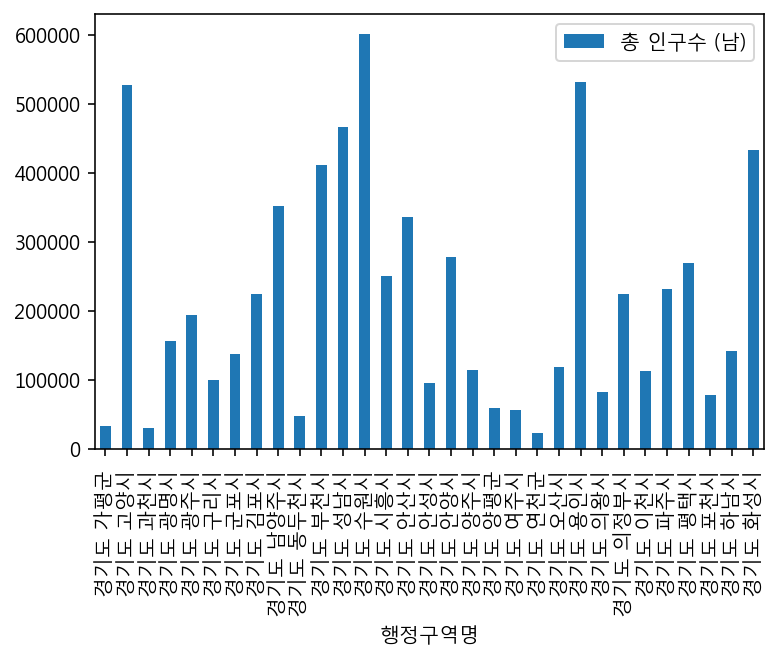

In [13]:
plt.figure(figsize=(15,10))
df2.plot(kind='bar',y='총 인구수 (남)')

<Figure size 1080x720 with 0 Axes>

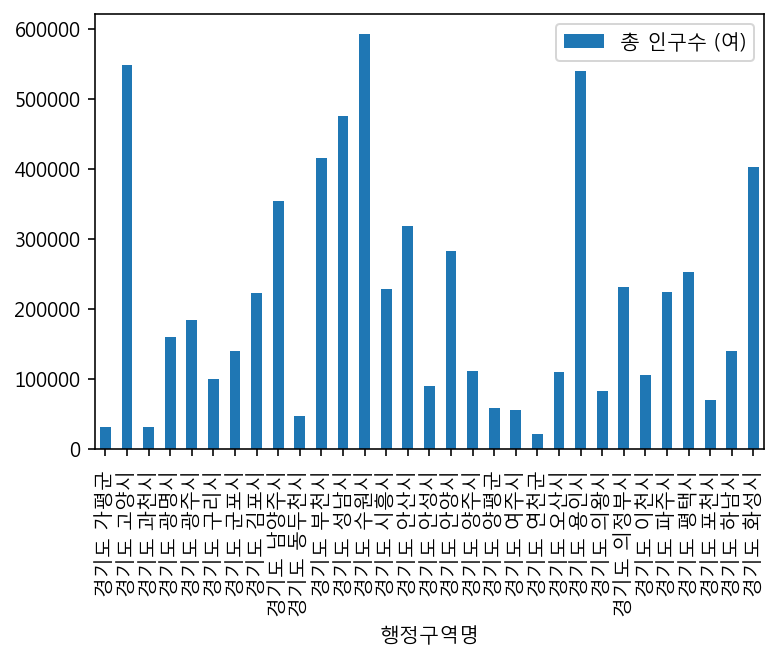

In [14]:
plt.figure(figsize=(15,10))
df2.plot(kind='bar',y='총 인구수 (여)')

In [15]:
df2.index

Index(['경기도 가평군 ', '경기도 고양시 ', '경기도 과천시 ', '경기도 광명시 ', '경기도 광주시 ', '경기도 구리시 ',
       '경기도 군포시 ', '경기도 김포시 ', '경기도 남양주시 ', '경기도 동두천시 ', '경기도 부천시 ',
       '경기도 성남시 ', '경기도 수원시 ', '경기도 시흥시 ', '경기도 안산시 ', '경기도 안성시 ', '경기도 안양시 ',
       '경기도 양주시 ', '경기도 양평군 ', '경기도 여주시 ', '경기도 연천군 ', '경기도 오산시 ', '경기도 용인시 ',
       '경기도 의왕시 ', '경기도 의정부시 ', '경기도 이천시 ', '경기도 파주시 ', '경기도 평택시 ', '경기도 포천시 ',
       '경기도 하남시 ', '경기도 화성시 '],
      dtype='object', name='행정구역명')

In [16]:
df2.columns[4:15]

Index(['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세',
       '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

In [17]:
back_text=['총 인구수','인구수 (남)','인구수 (여)']

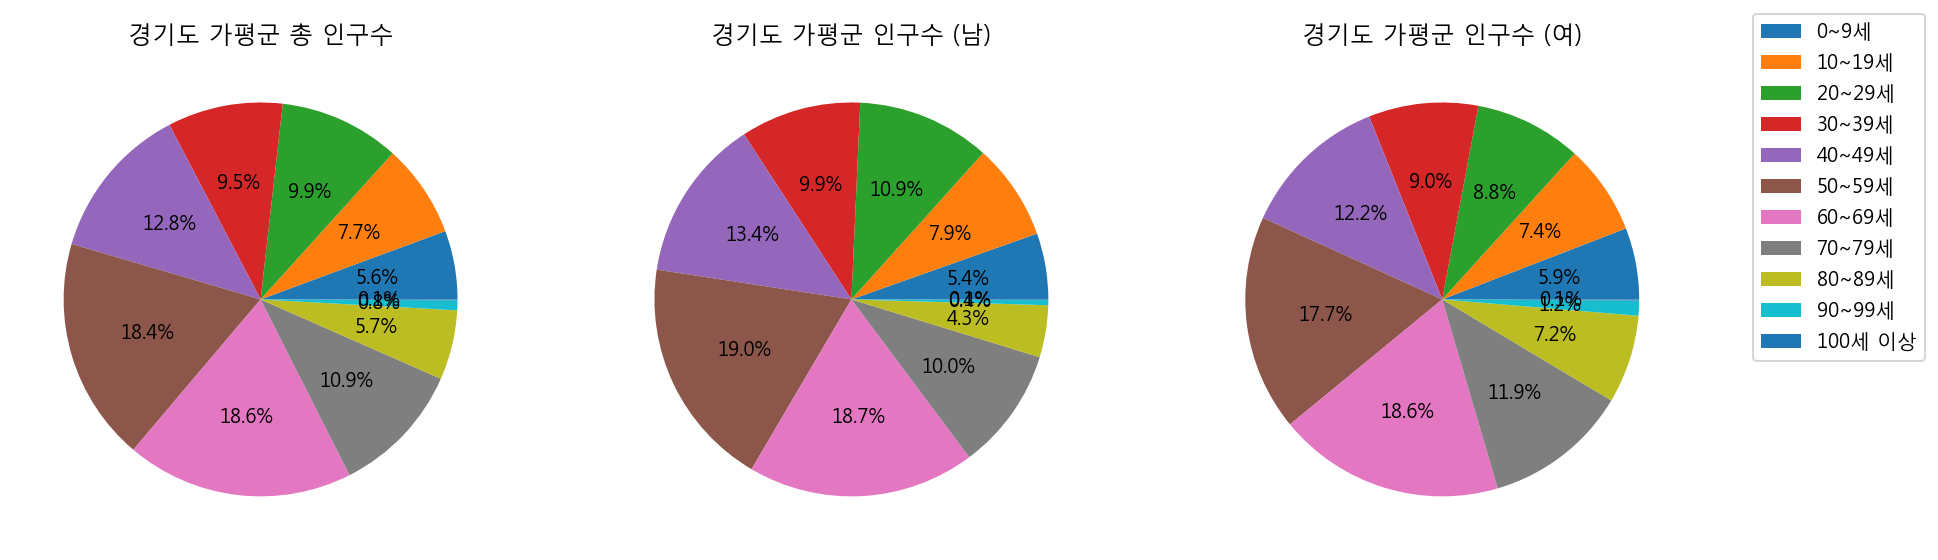

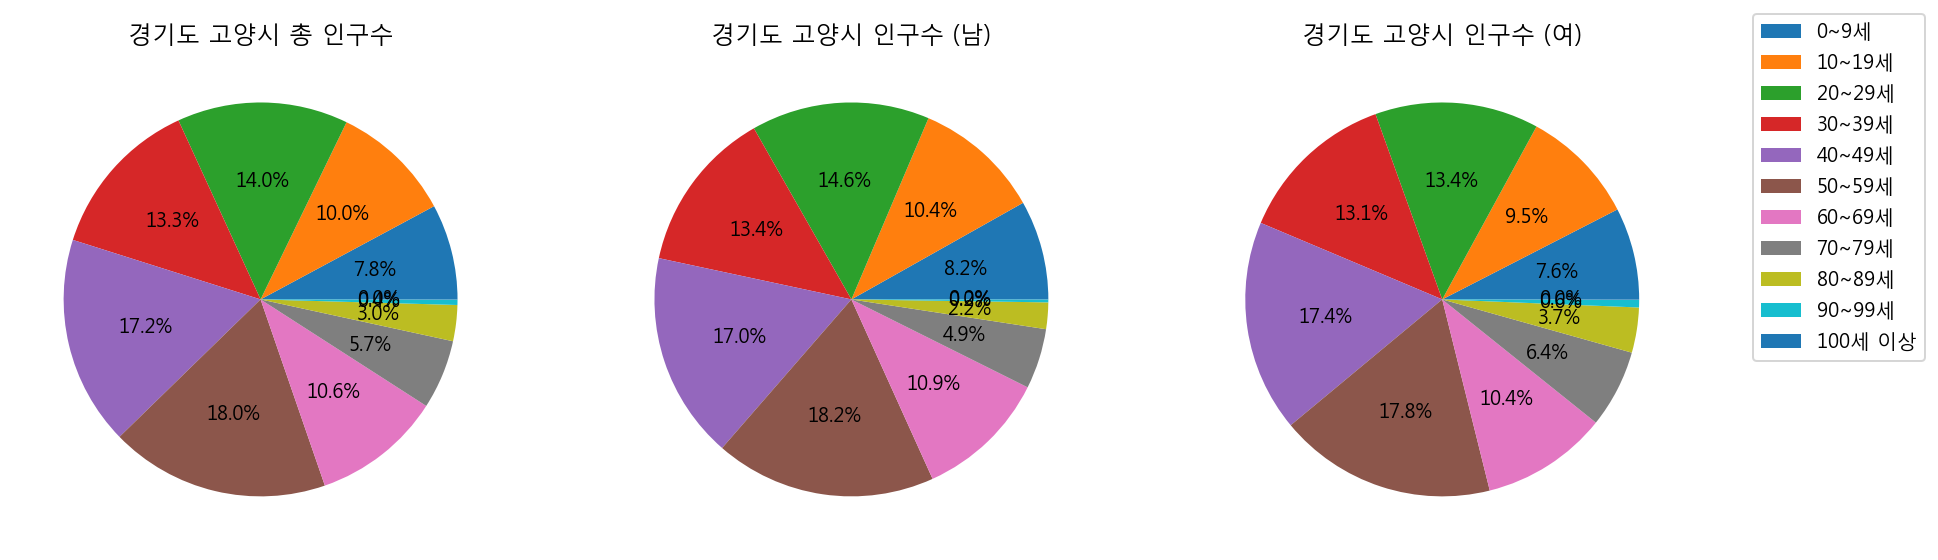

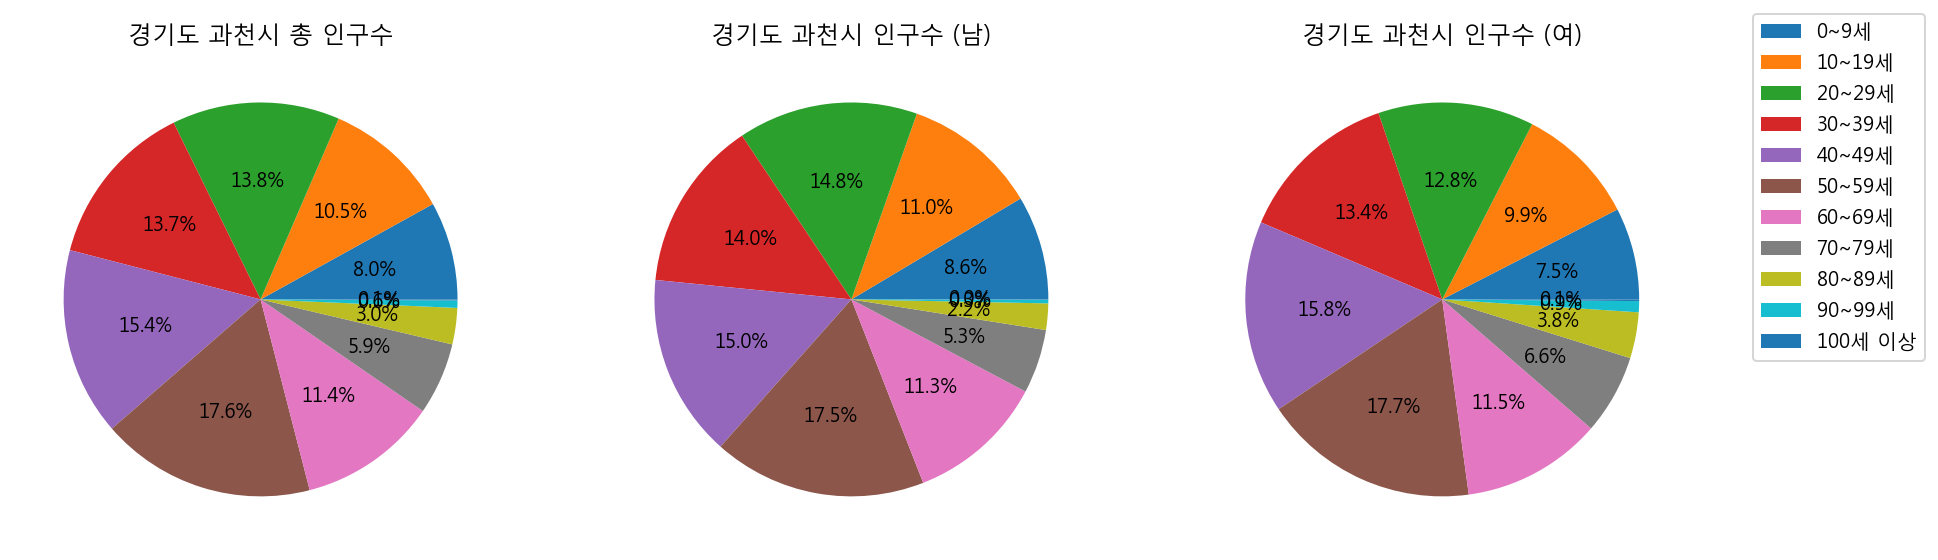

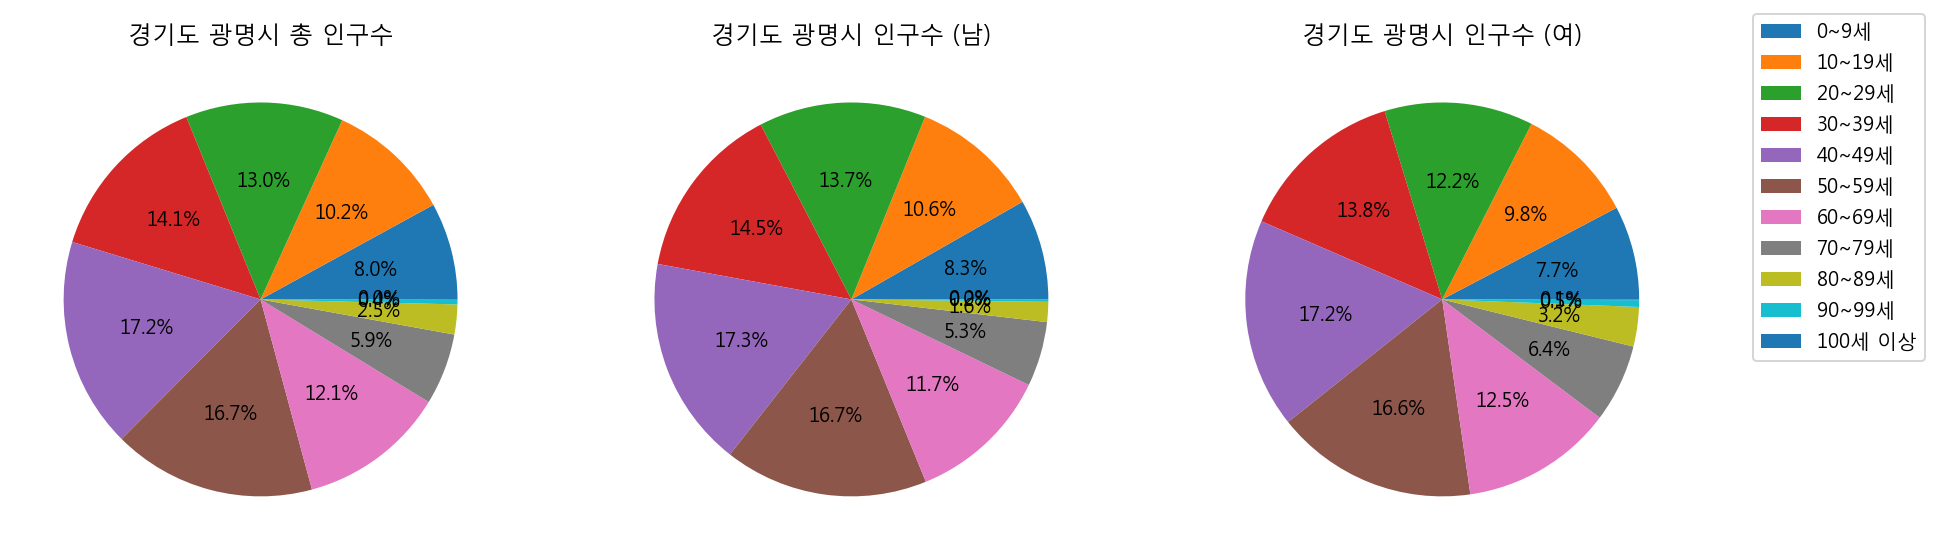

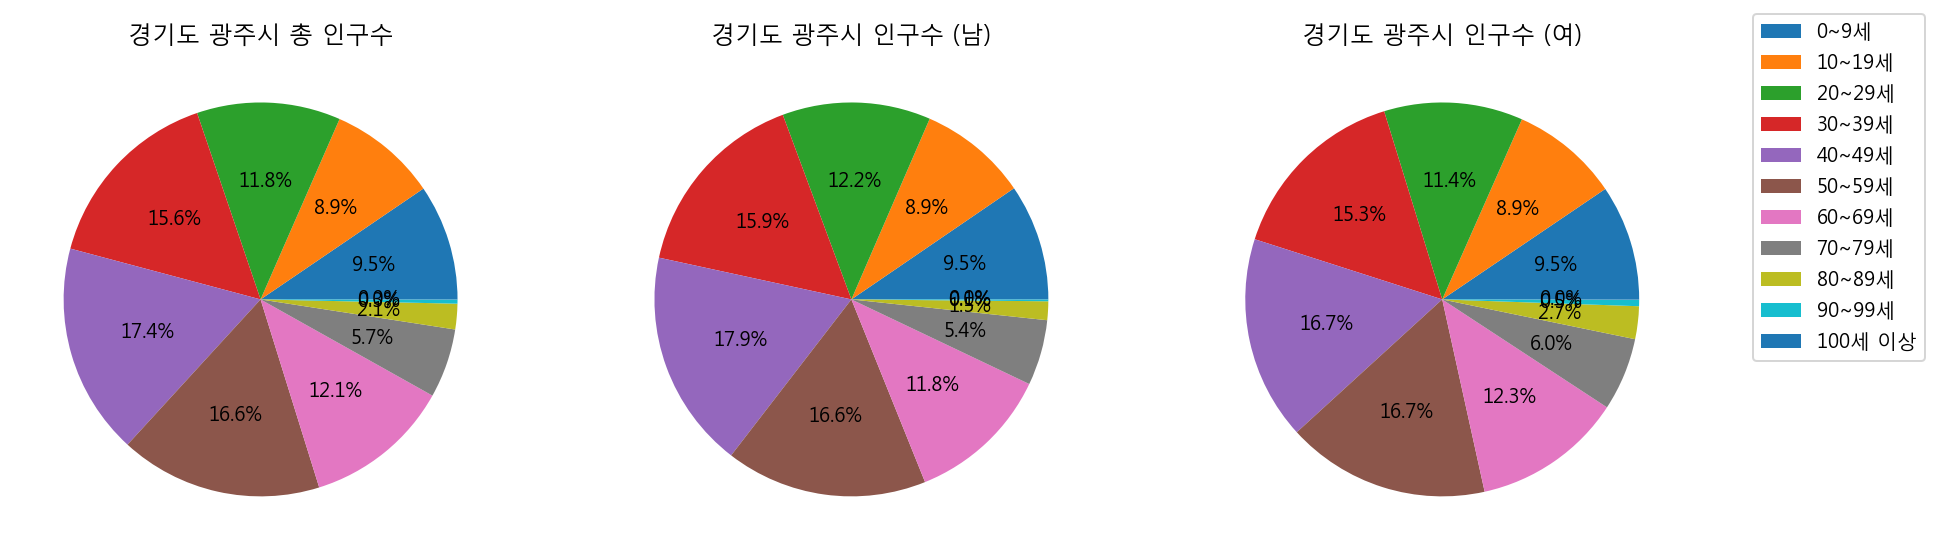

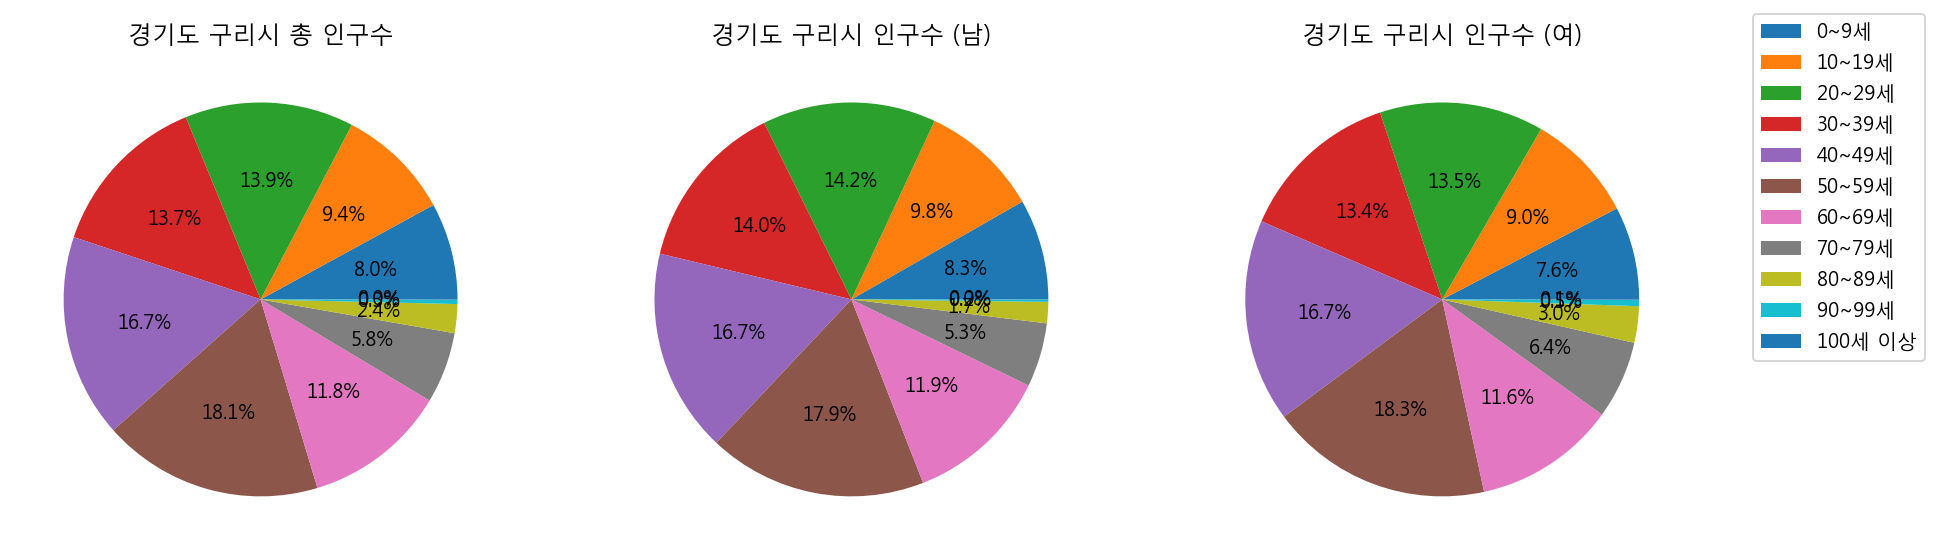

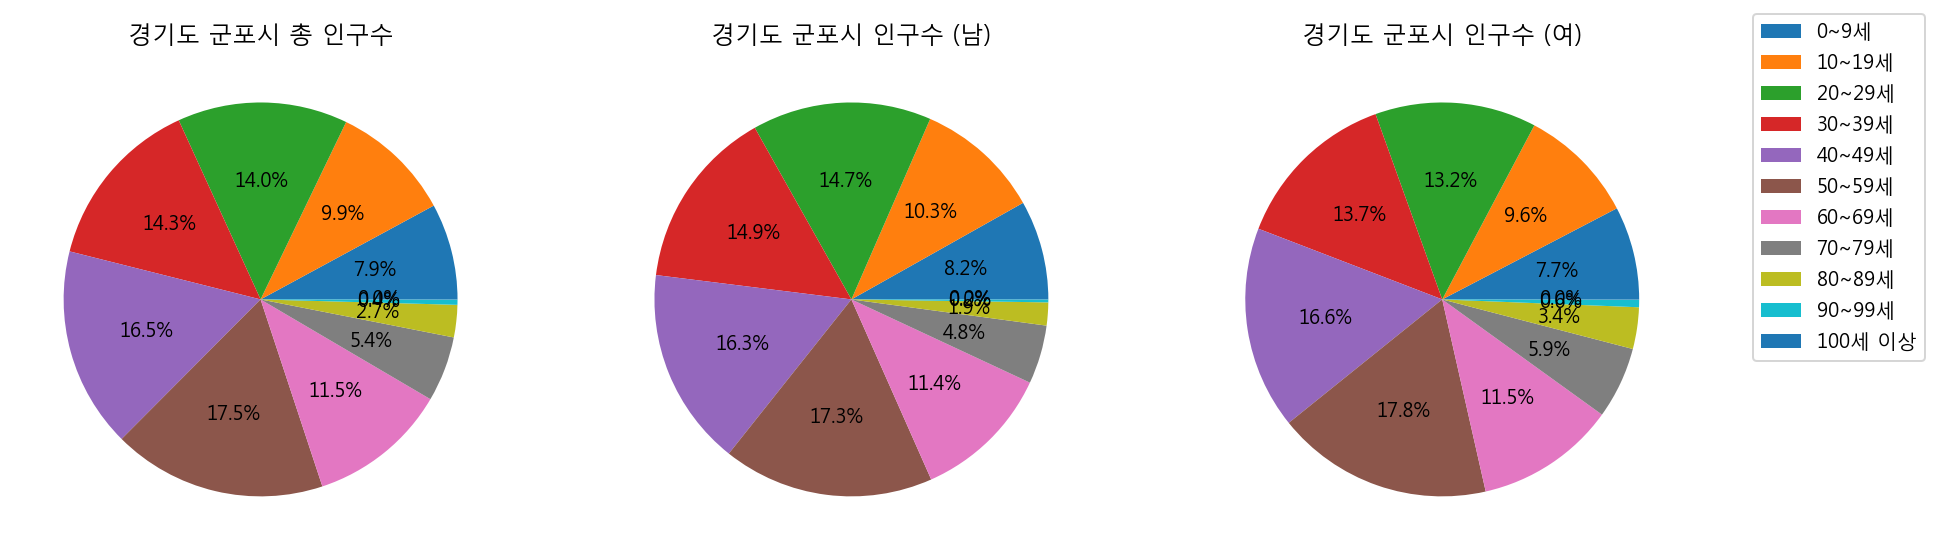

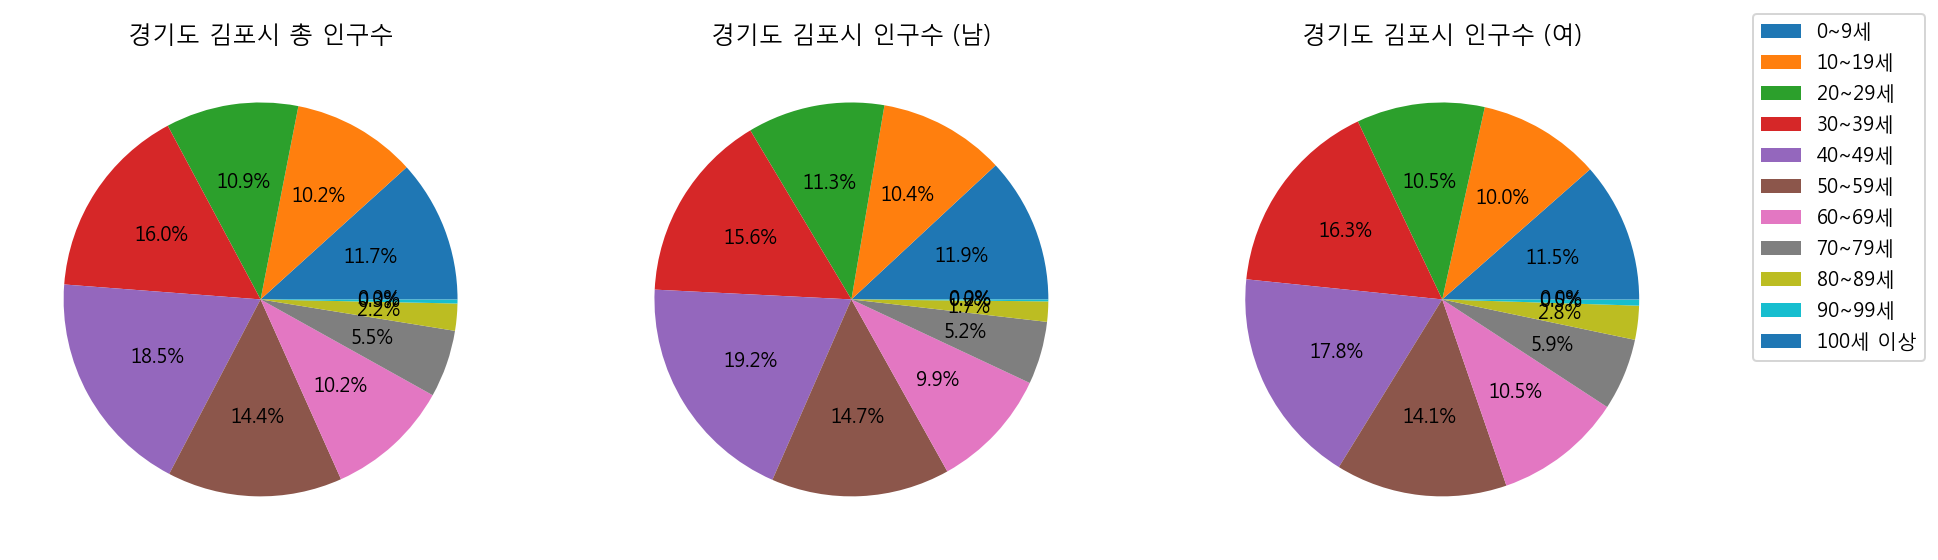

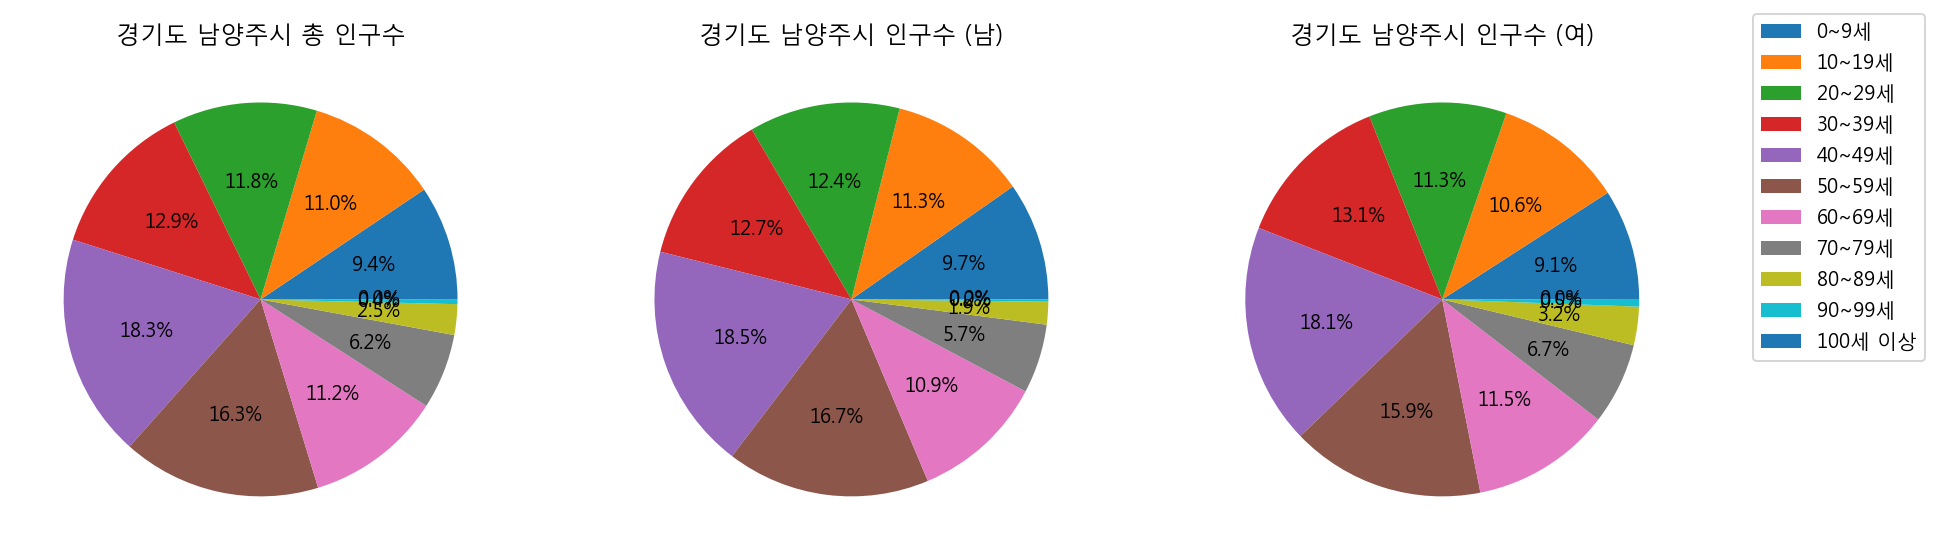

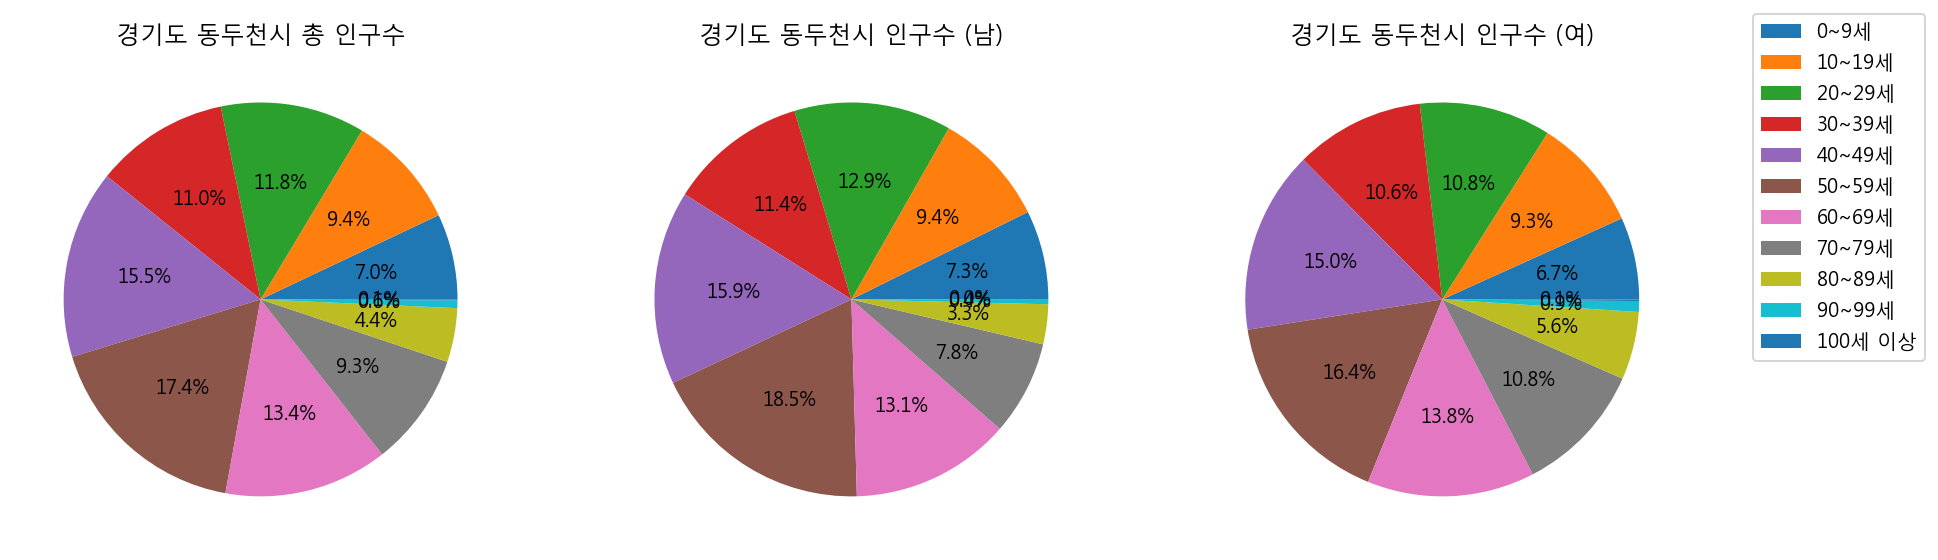

In [20]:
for i in range(10):    
    fig, axs = plt.subplots(figsize=(15,5),nrows=1,ncols=3)
    for x in range(3):
        axs[x].pie(df2.iloc[i,4+(x*12):15+(x*12)],autopct='%1.1f%%')
        axs[x].set_title(df2.index[i]+back_text[x])
    plt.legend(df2.columns[4:15],bbox_to_anchor=(1.5,1.1))
    plt.show

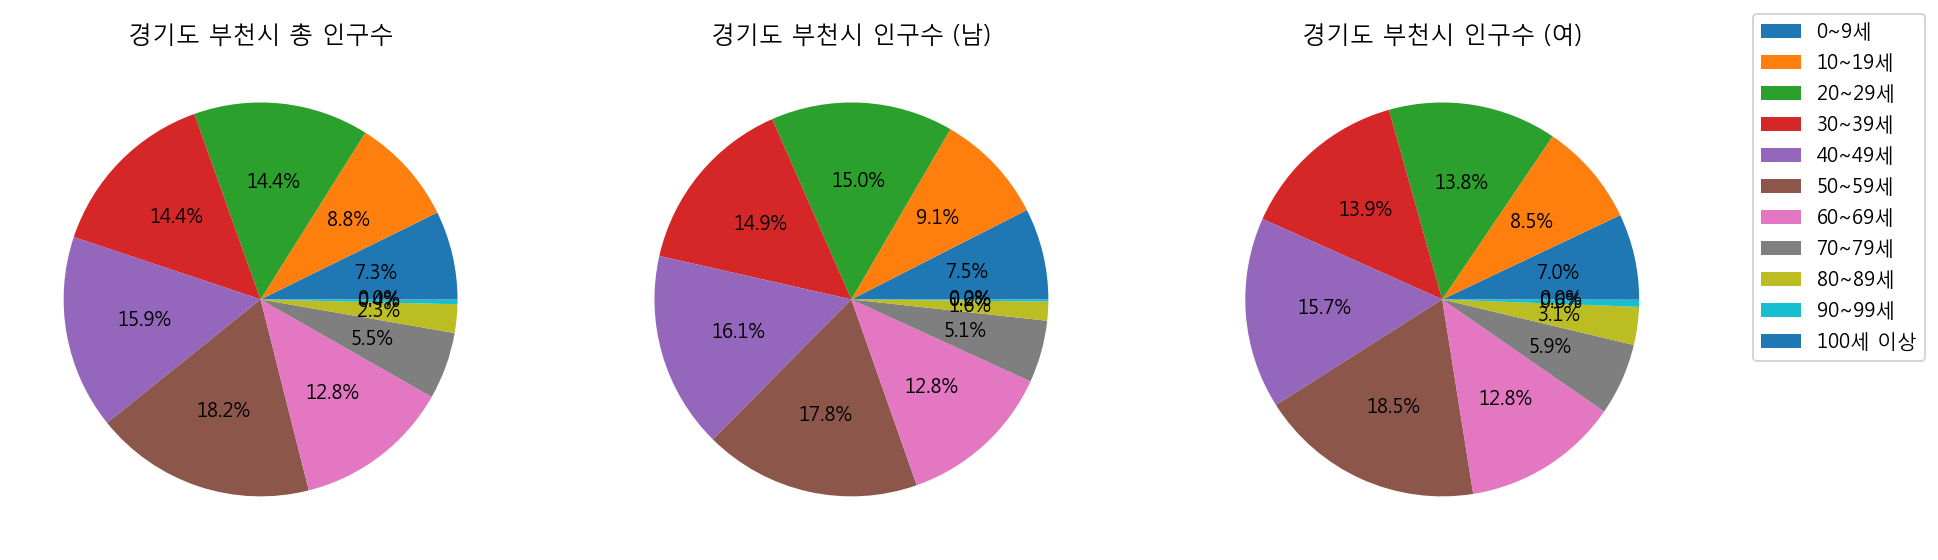

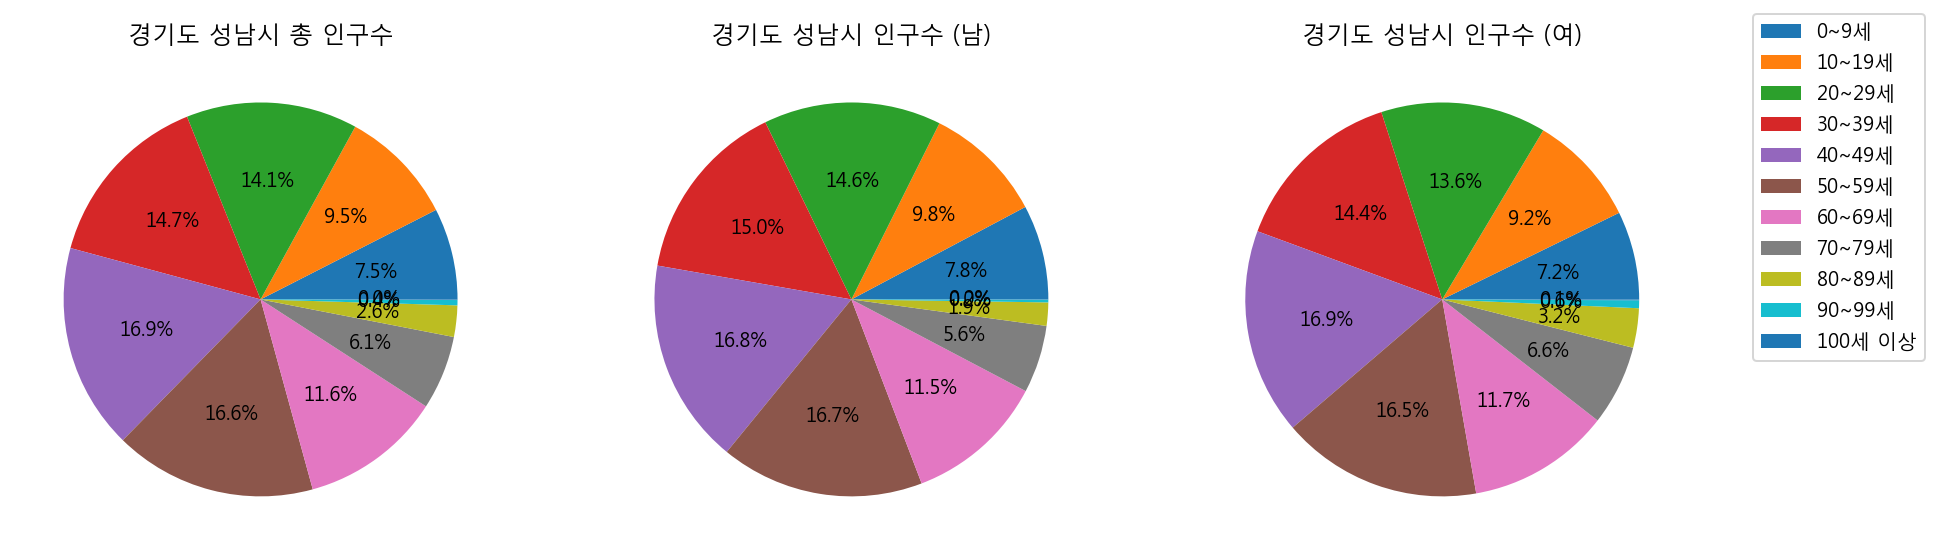

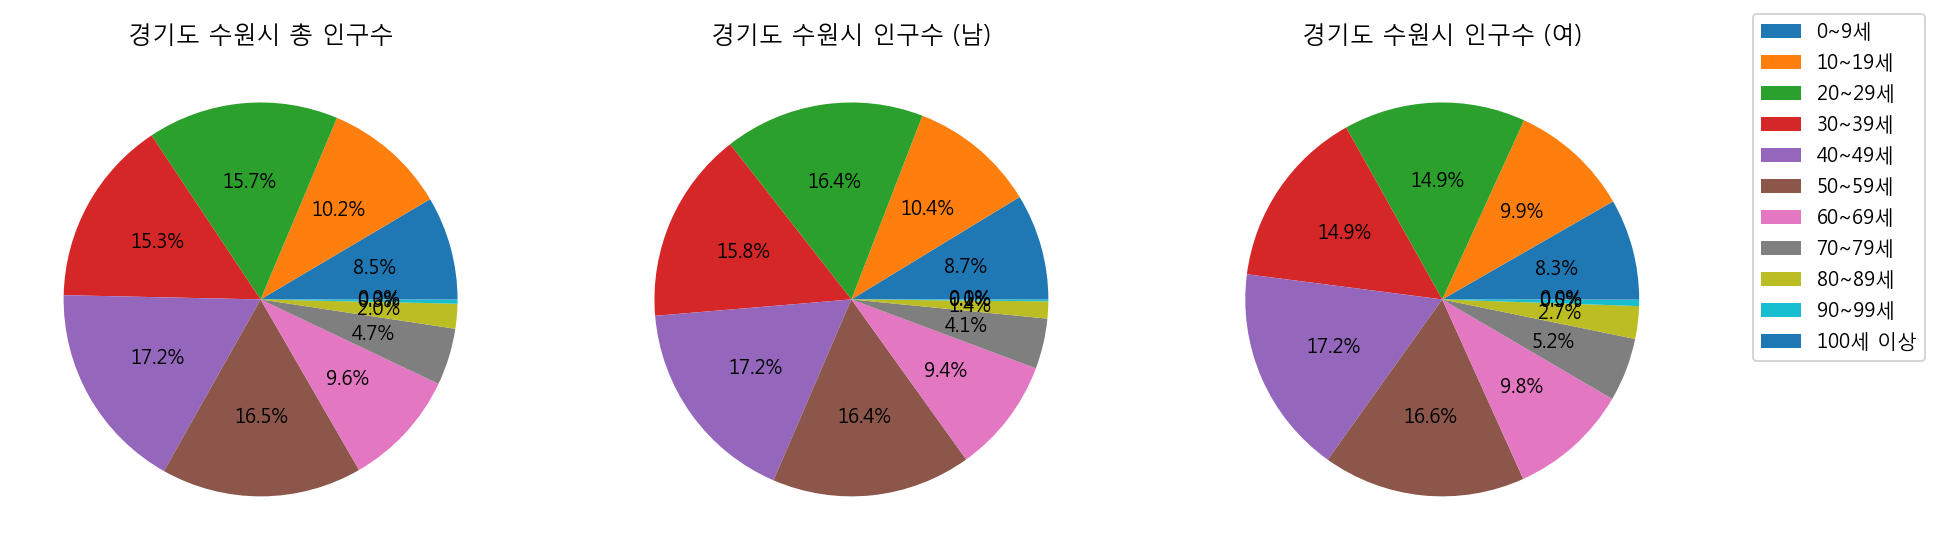

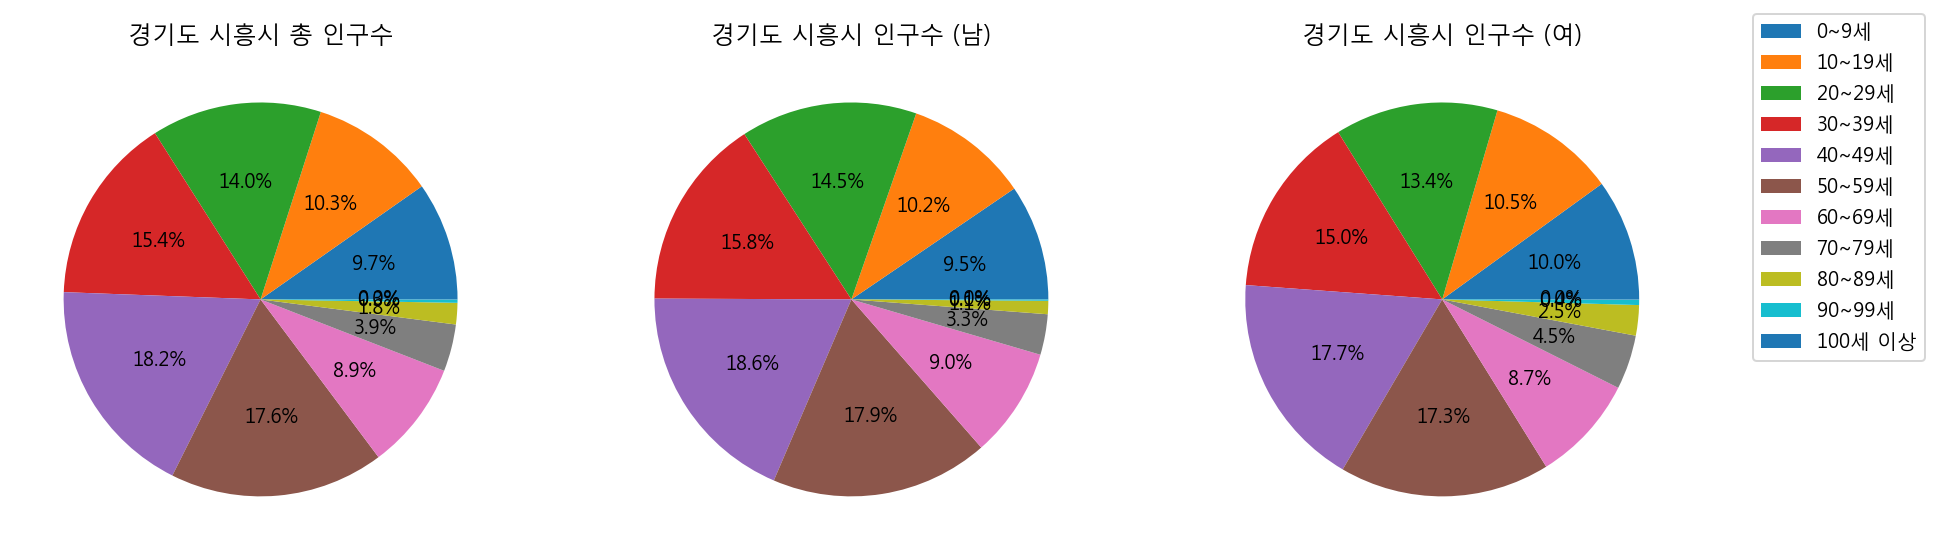

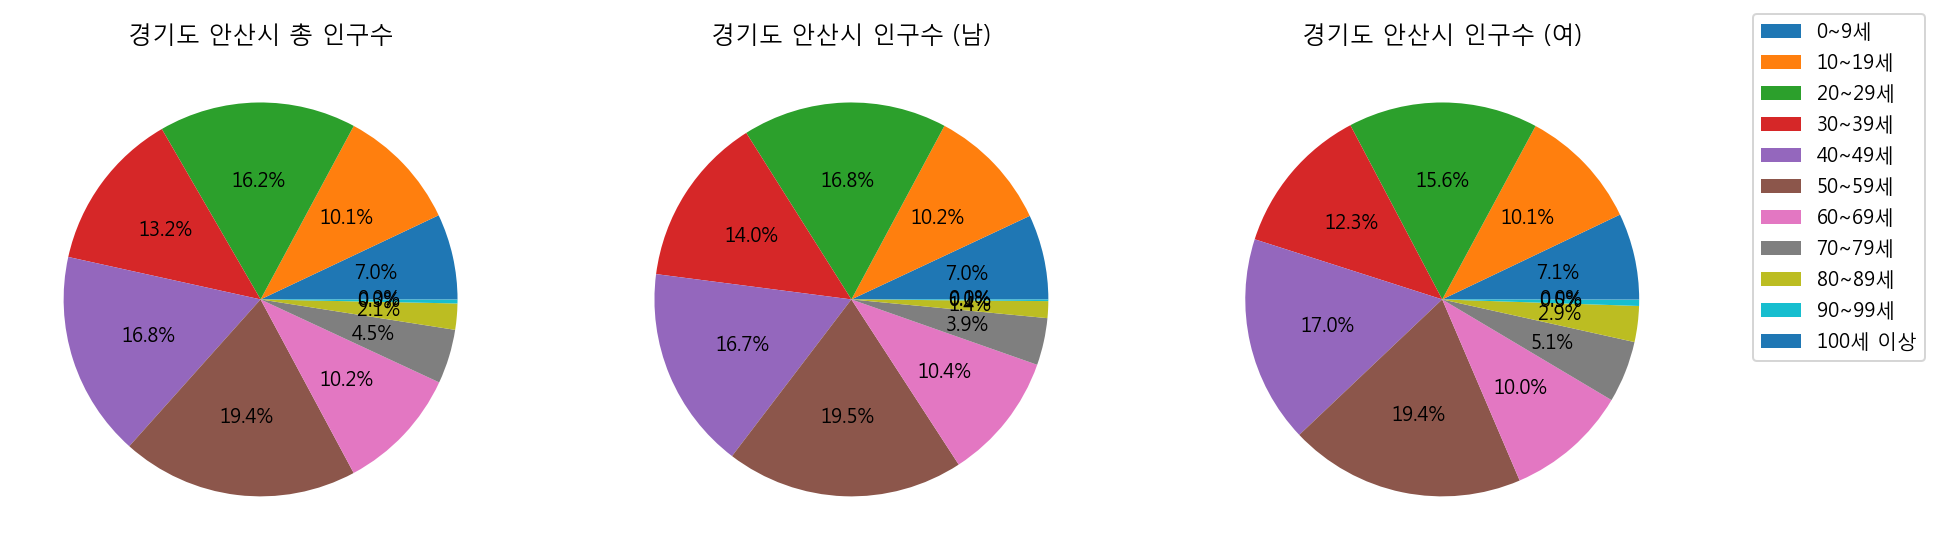

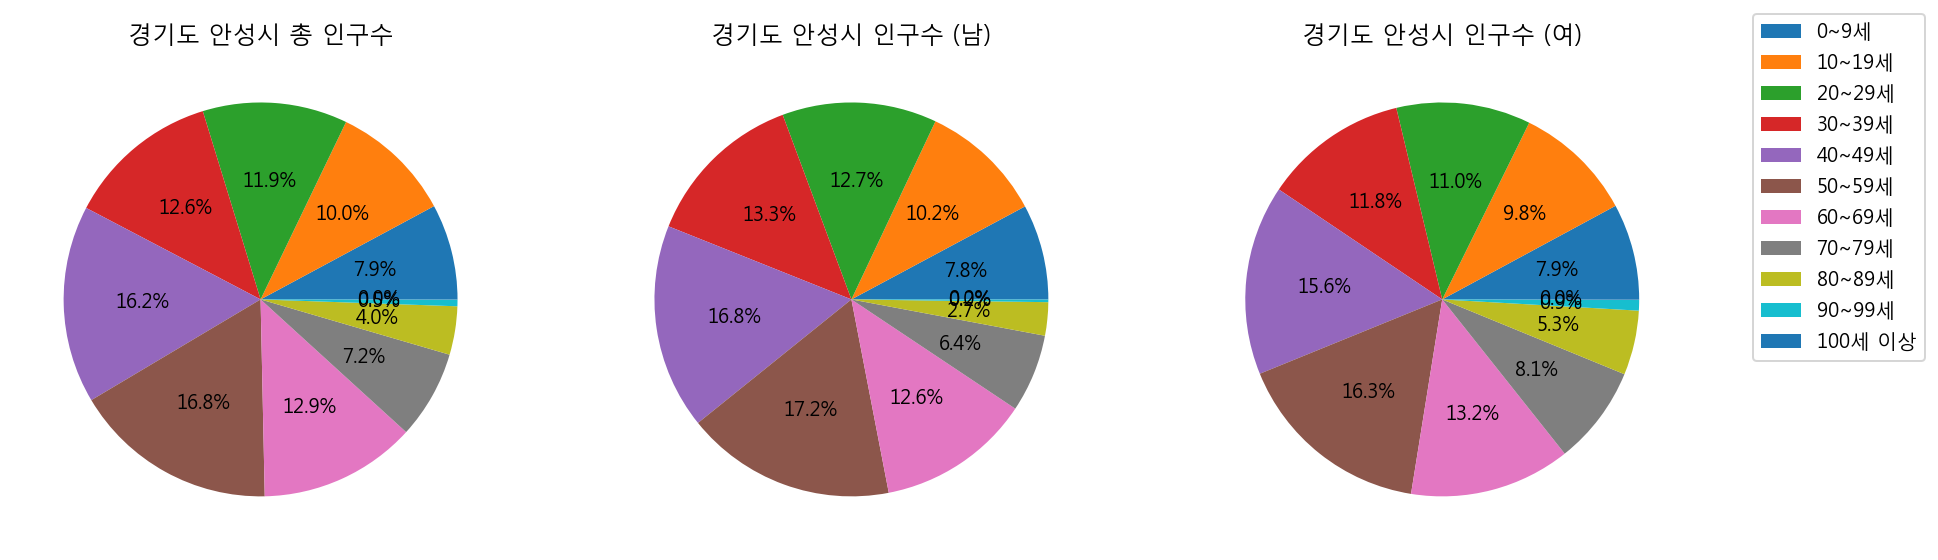

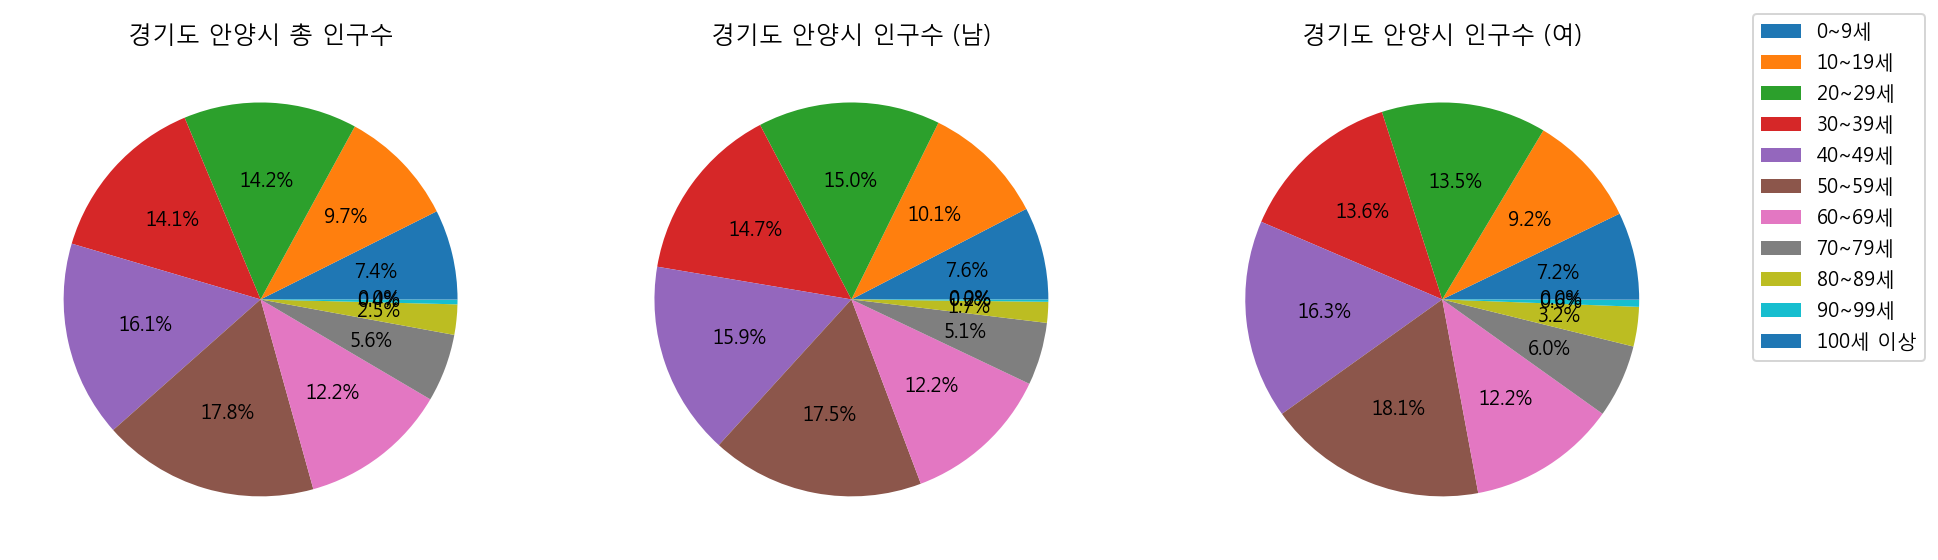

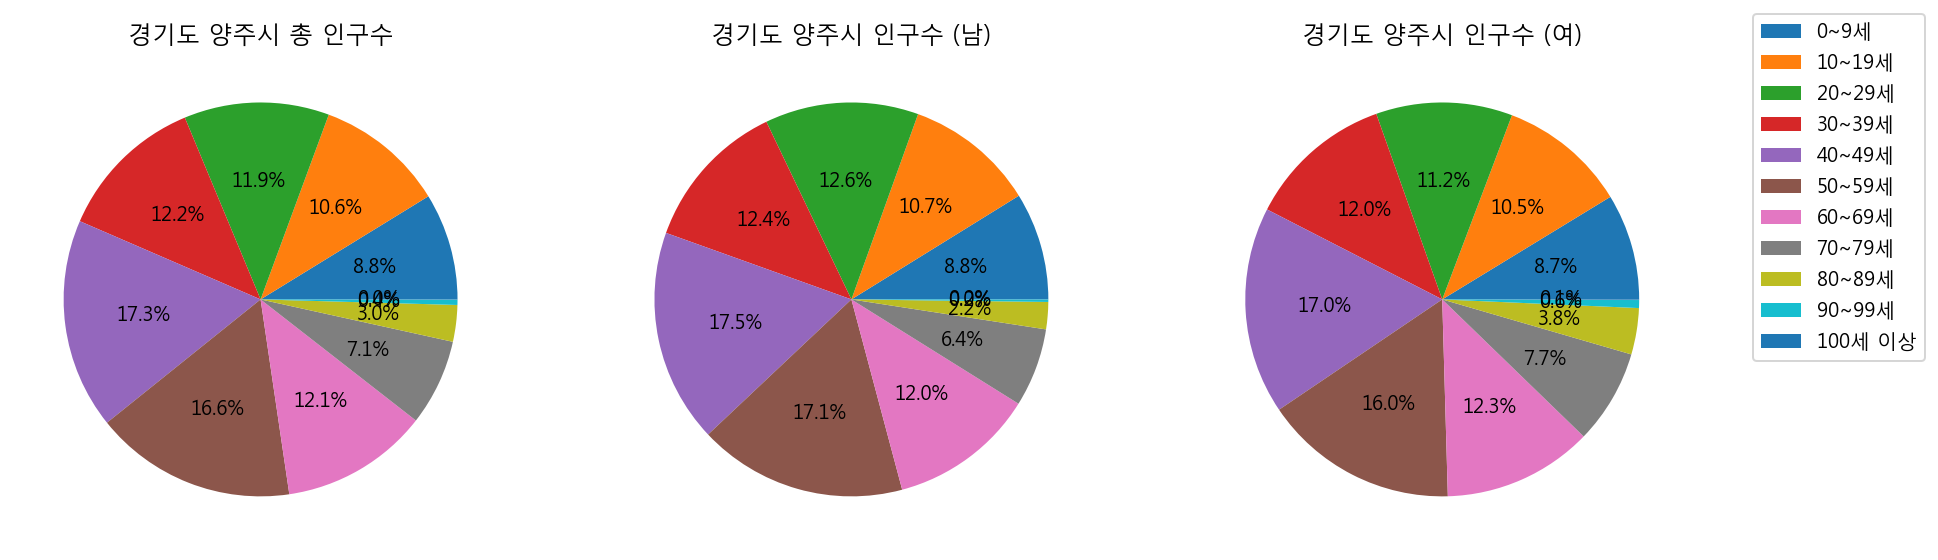

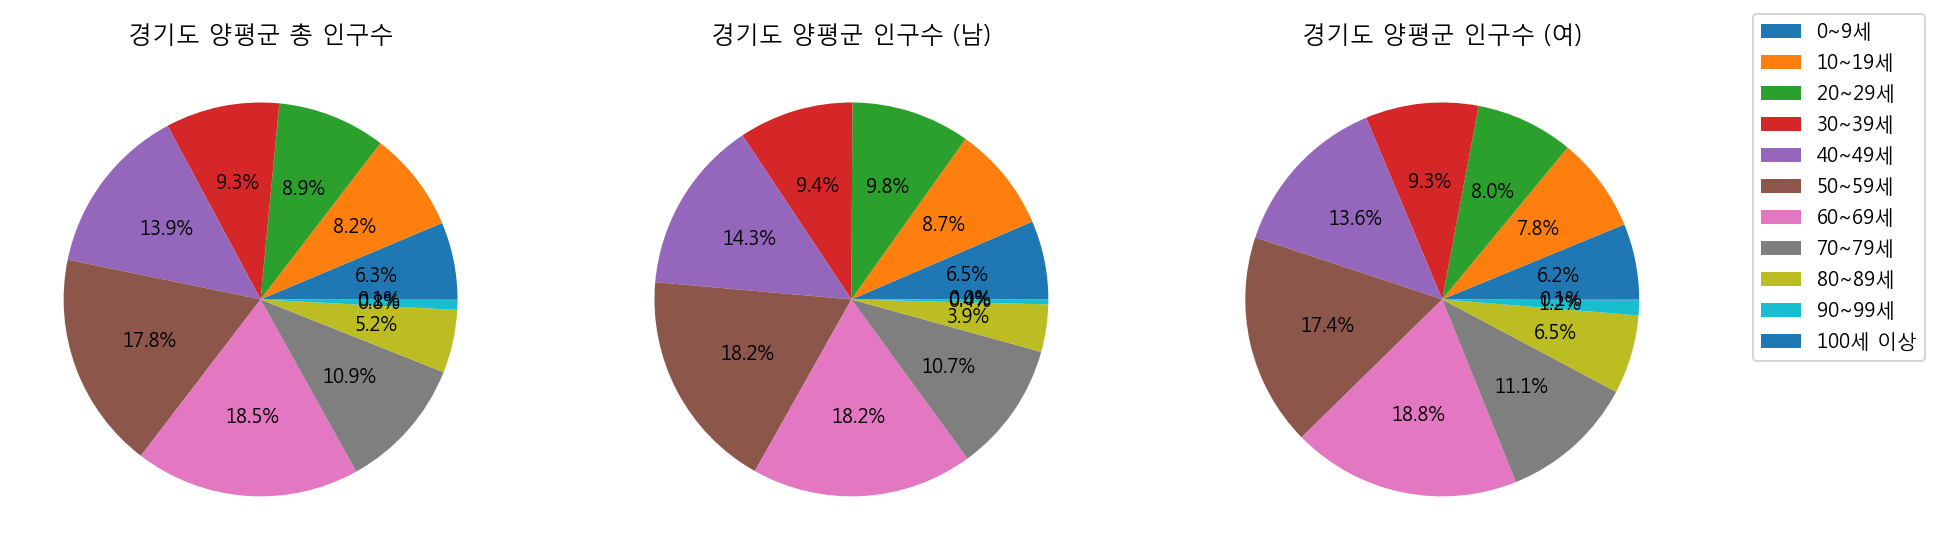

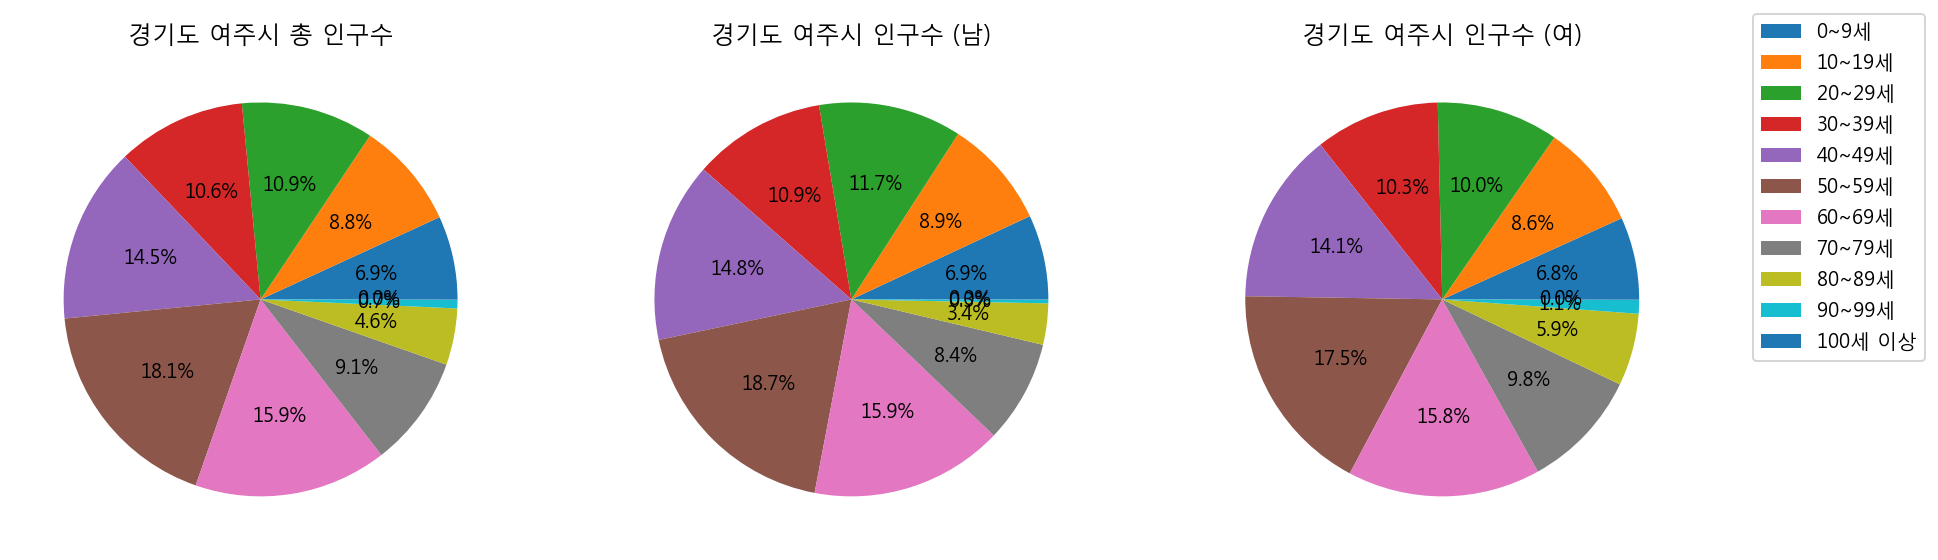

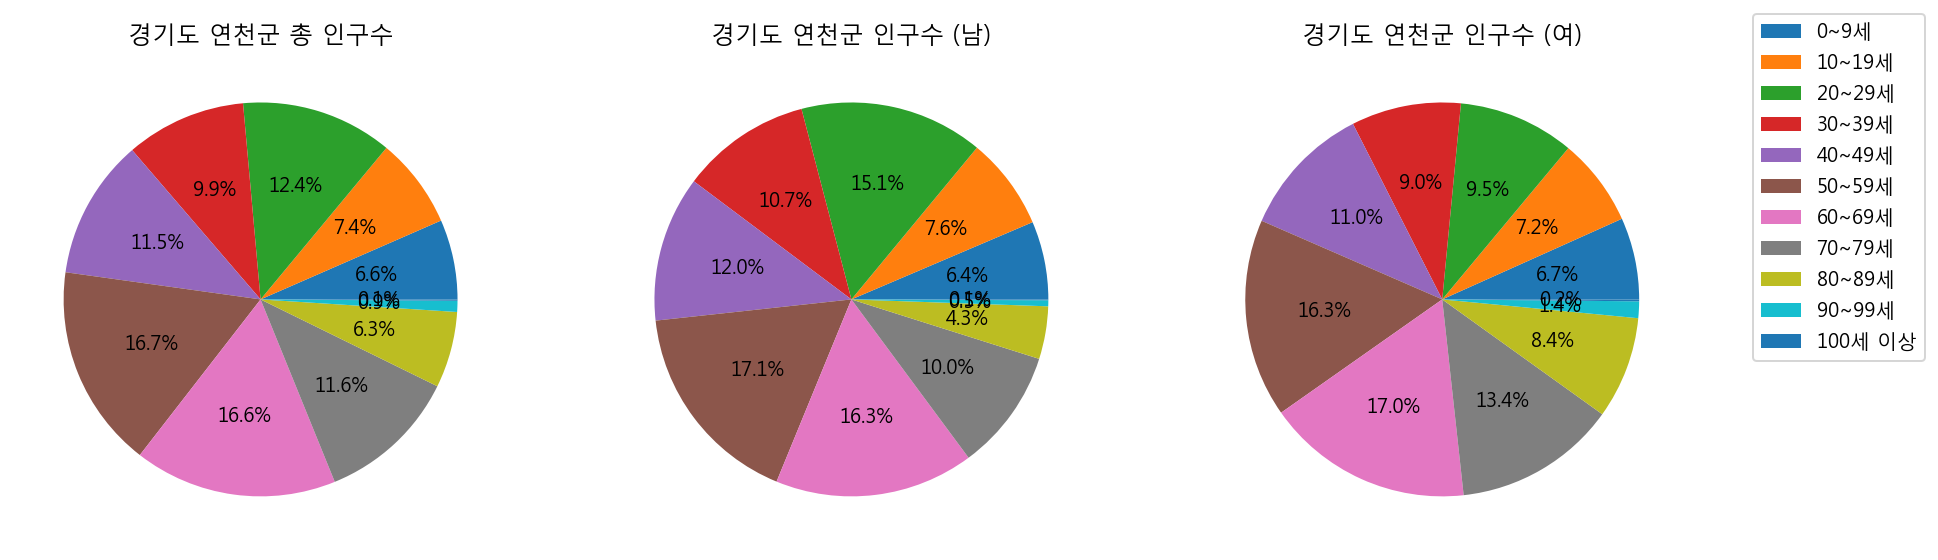

In [21]:
for i in range(10,21):    
    fig, axs = plt.subplots(figsize=(15,5),nrows=1,ncols=3)
    for x in range(3):
        axs[x].pie(df2.iloc[i,4+(x*12):15+(x*12)],autopct='%1.1f%%')
        axs[x].set_title(df2.index[i]+back_text[x])
    plt.legend(df2.columns[4:15],bbox_to_anchor=(1.5,1.1))
    plt.show

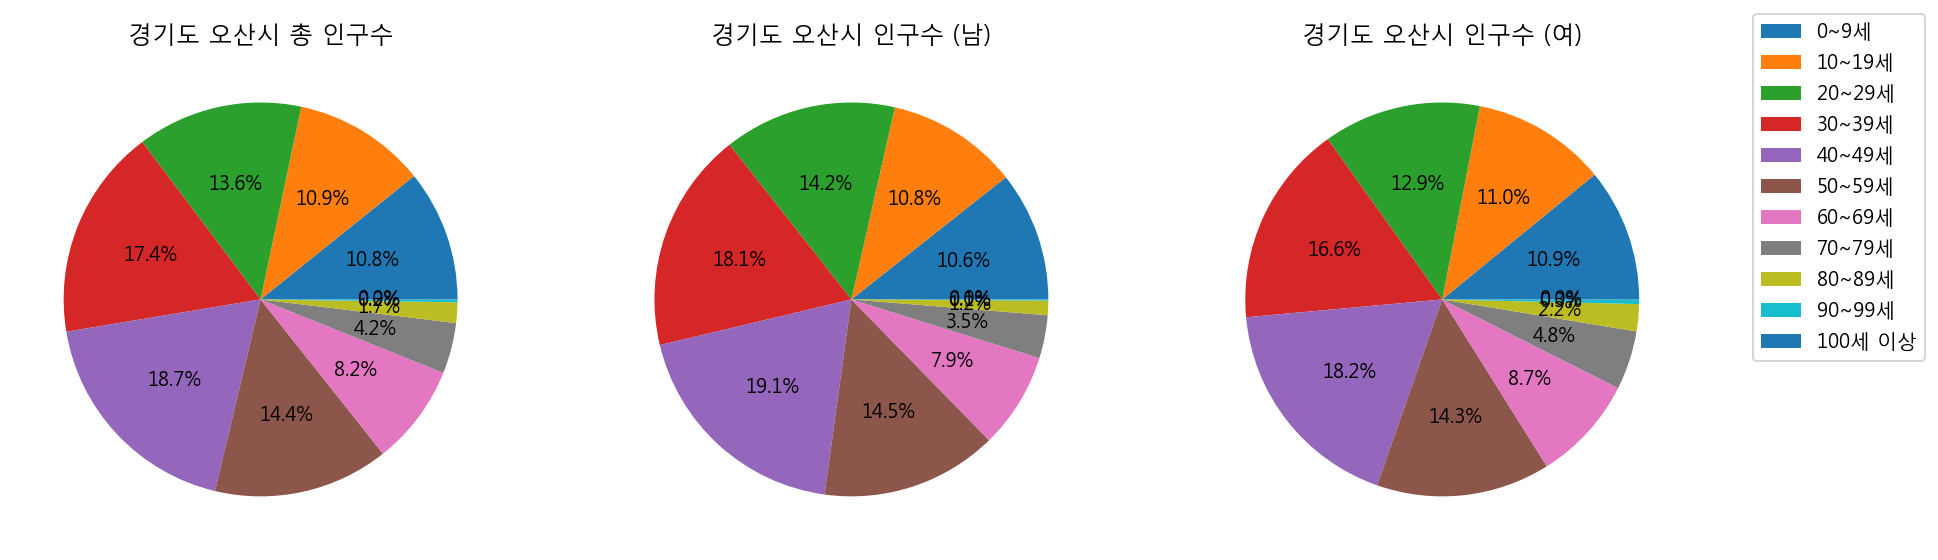

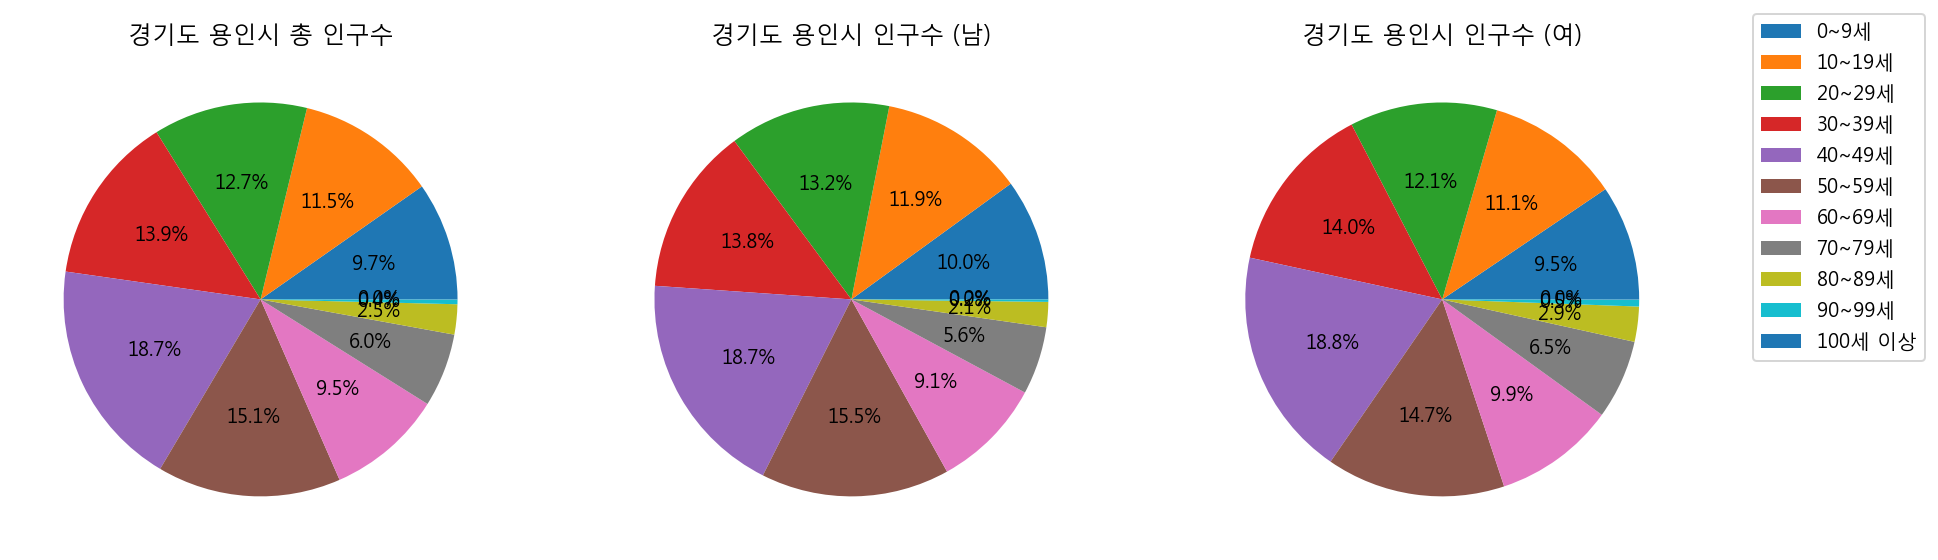

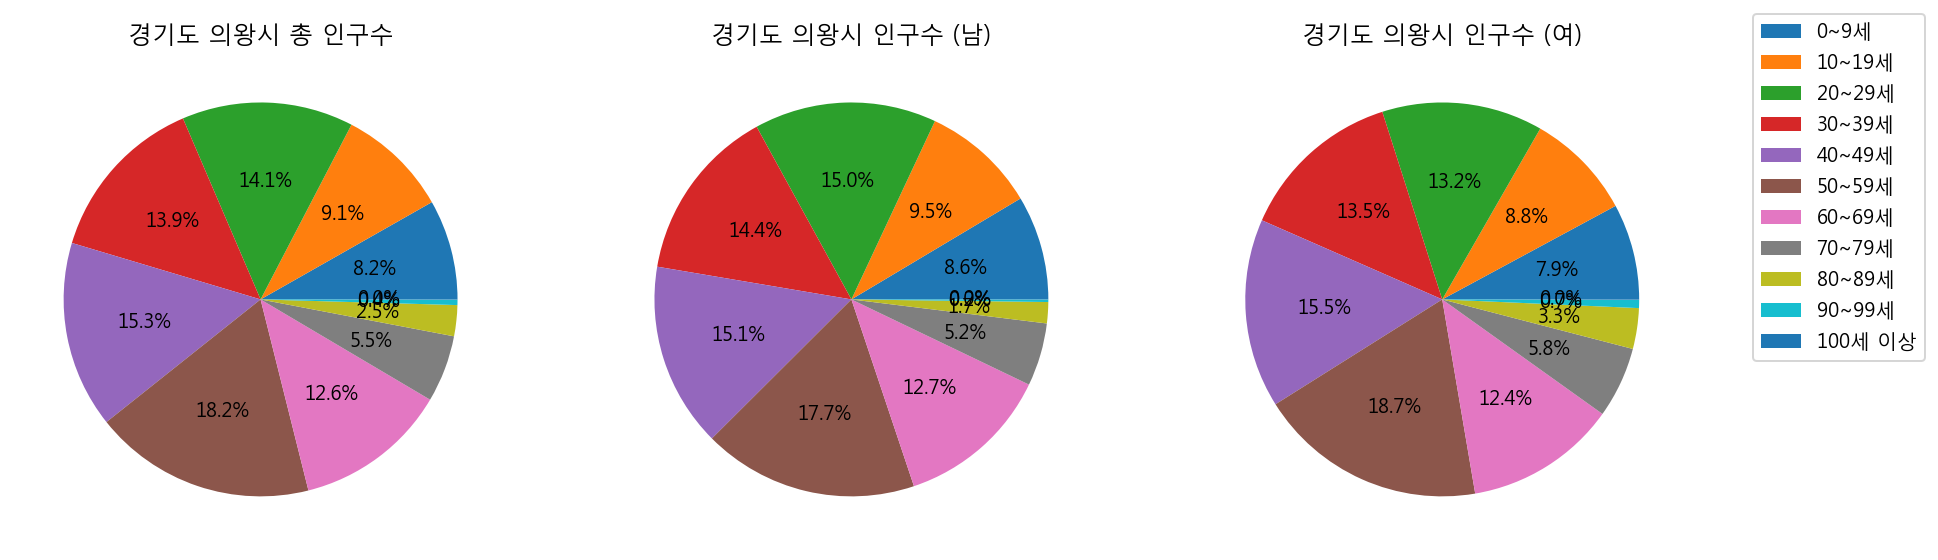

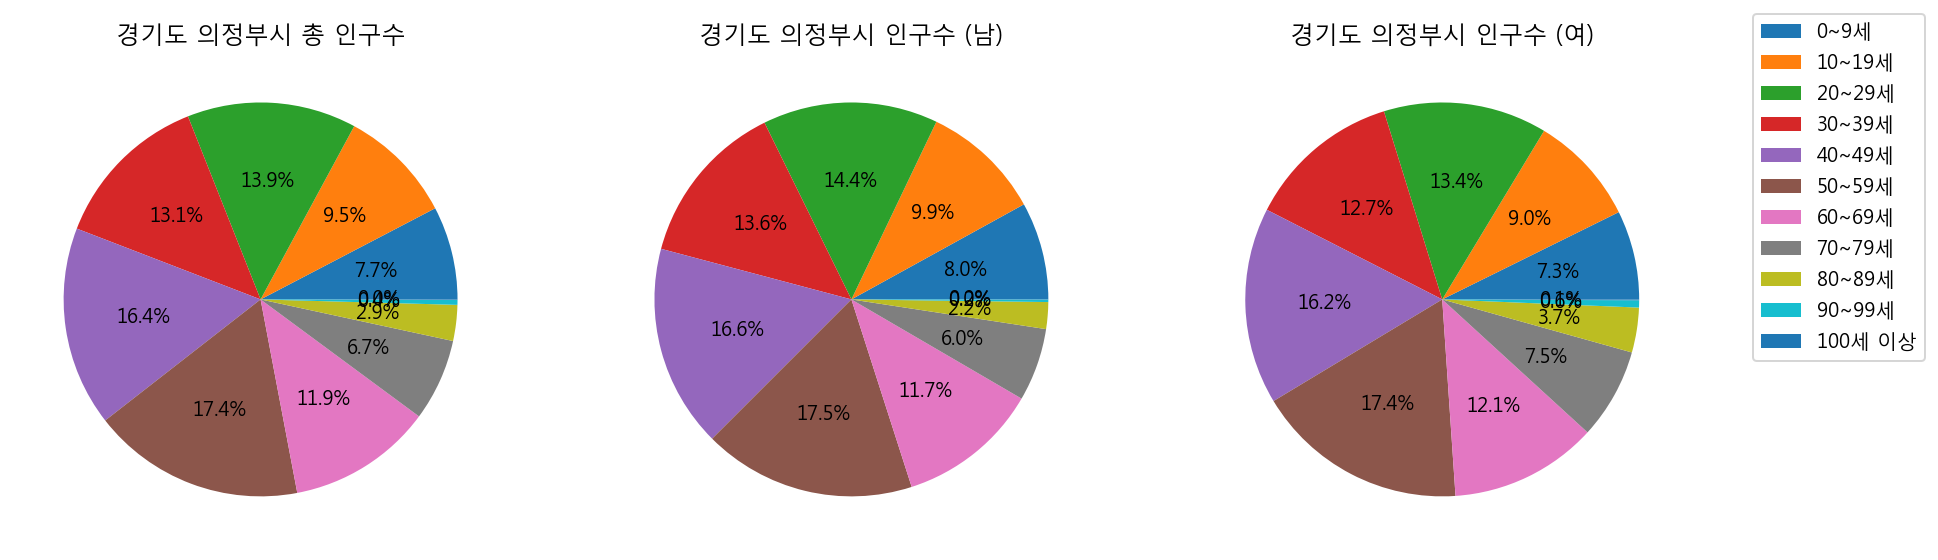

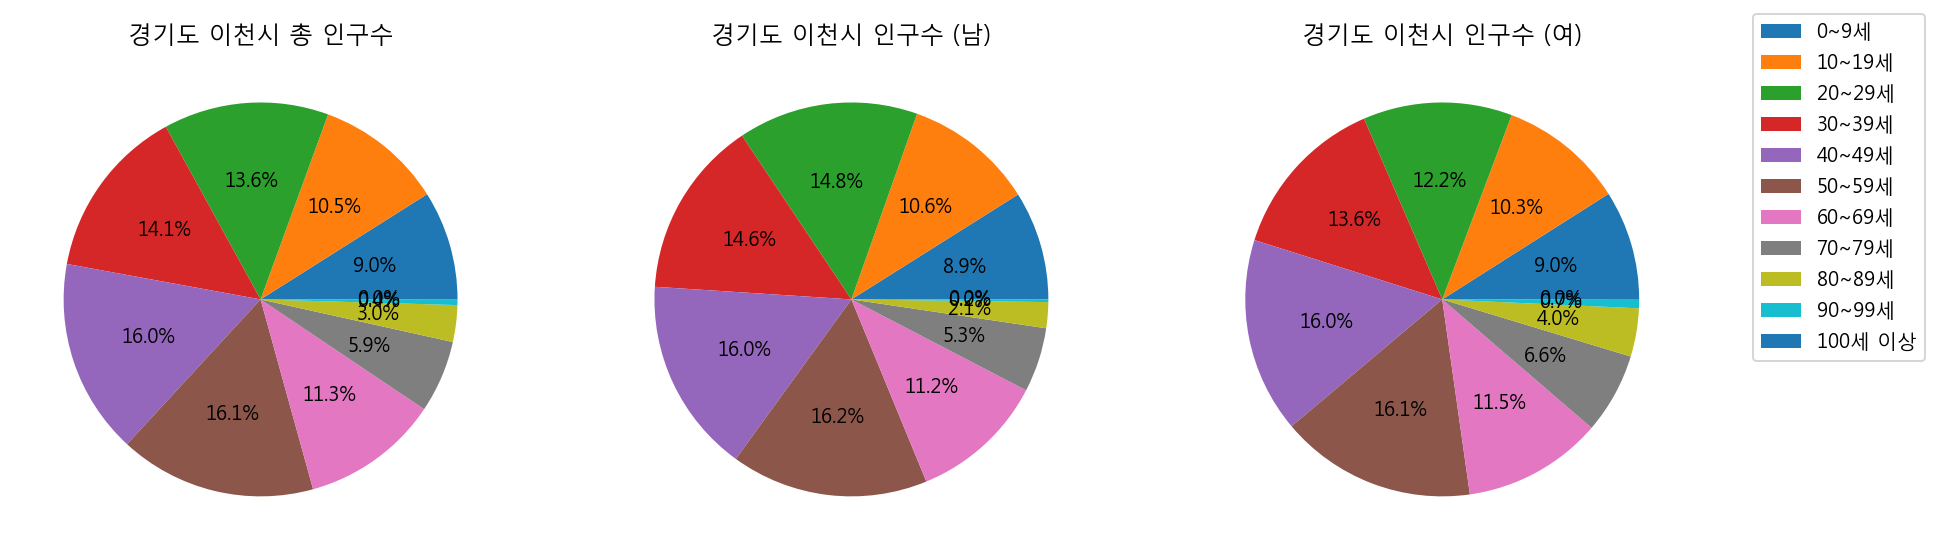

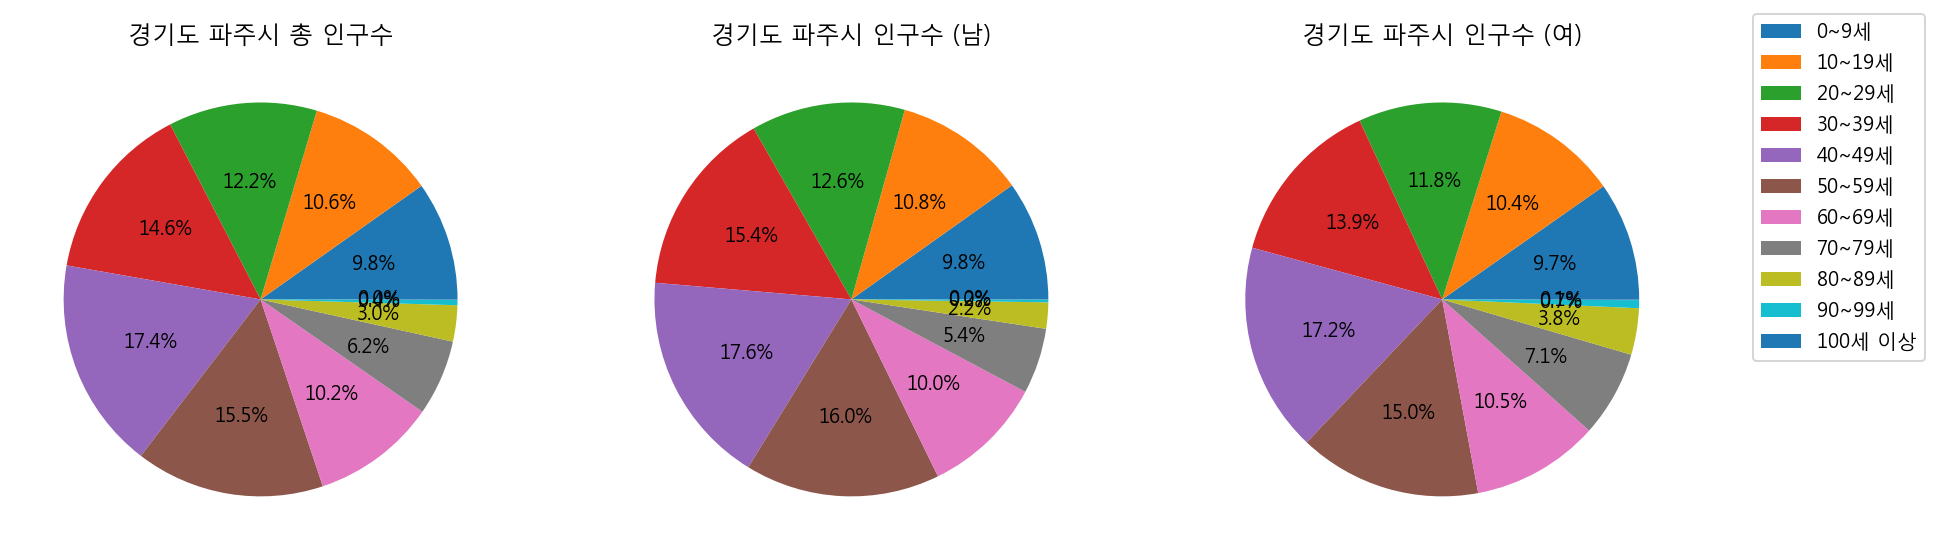

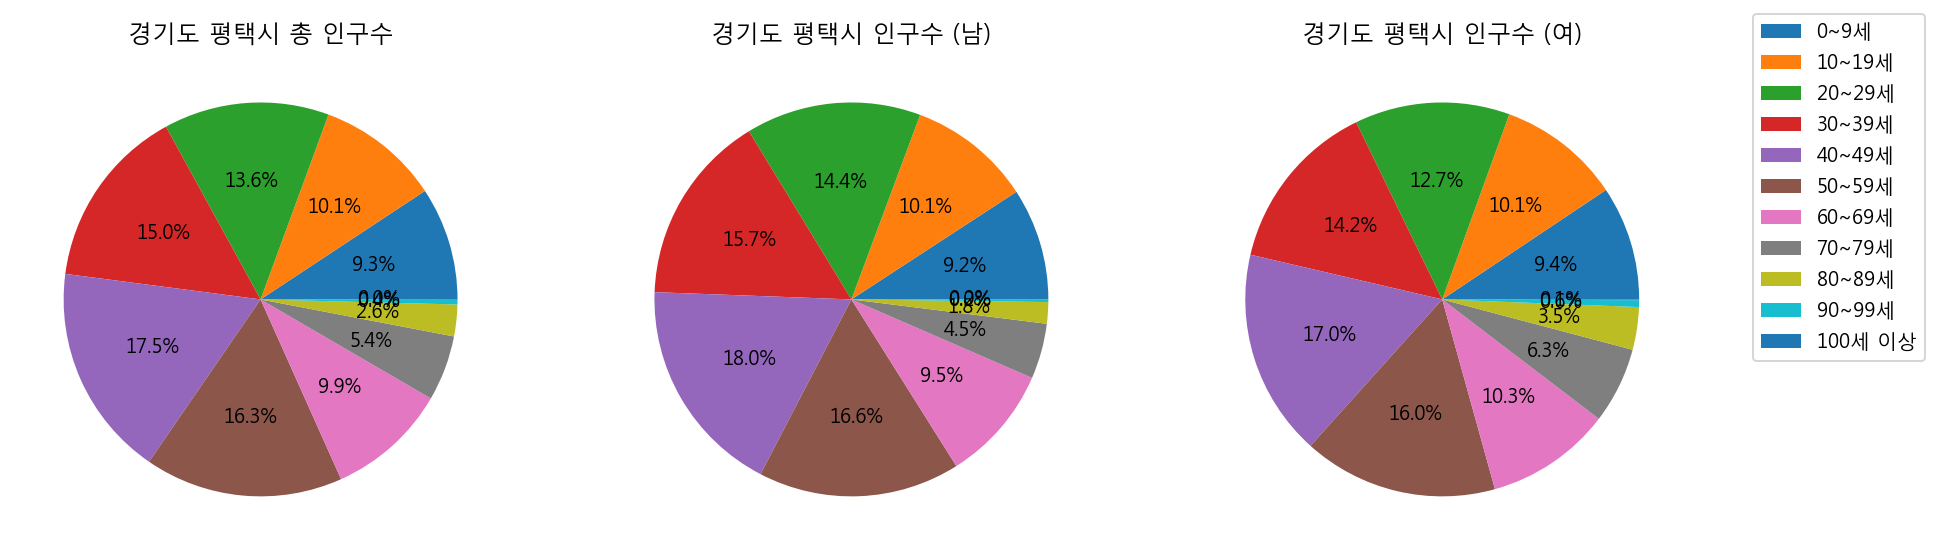

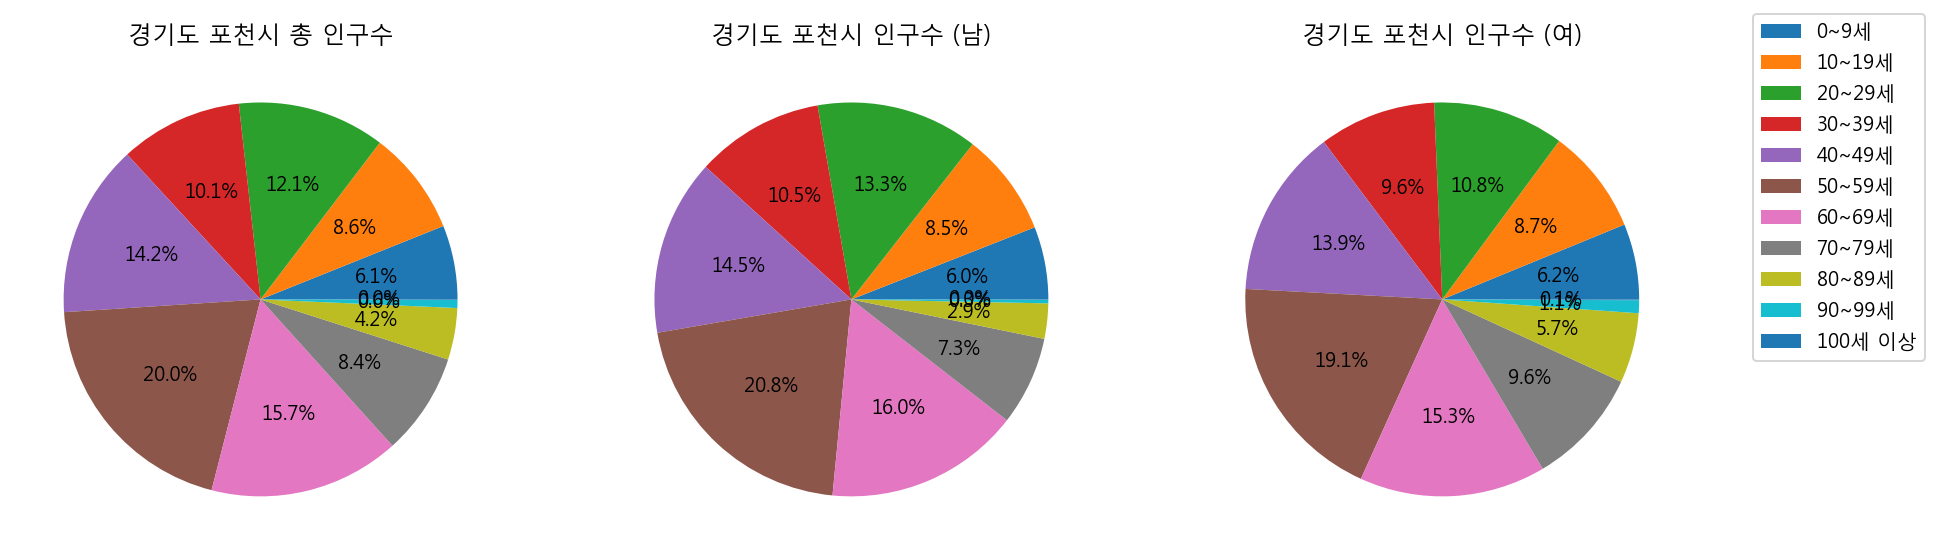

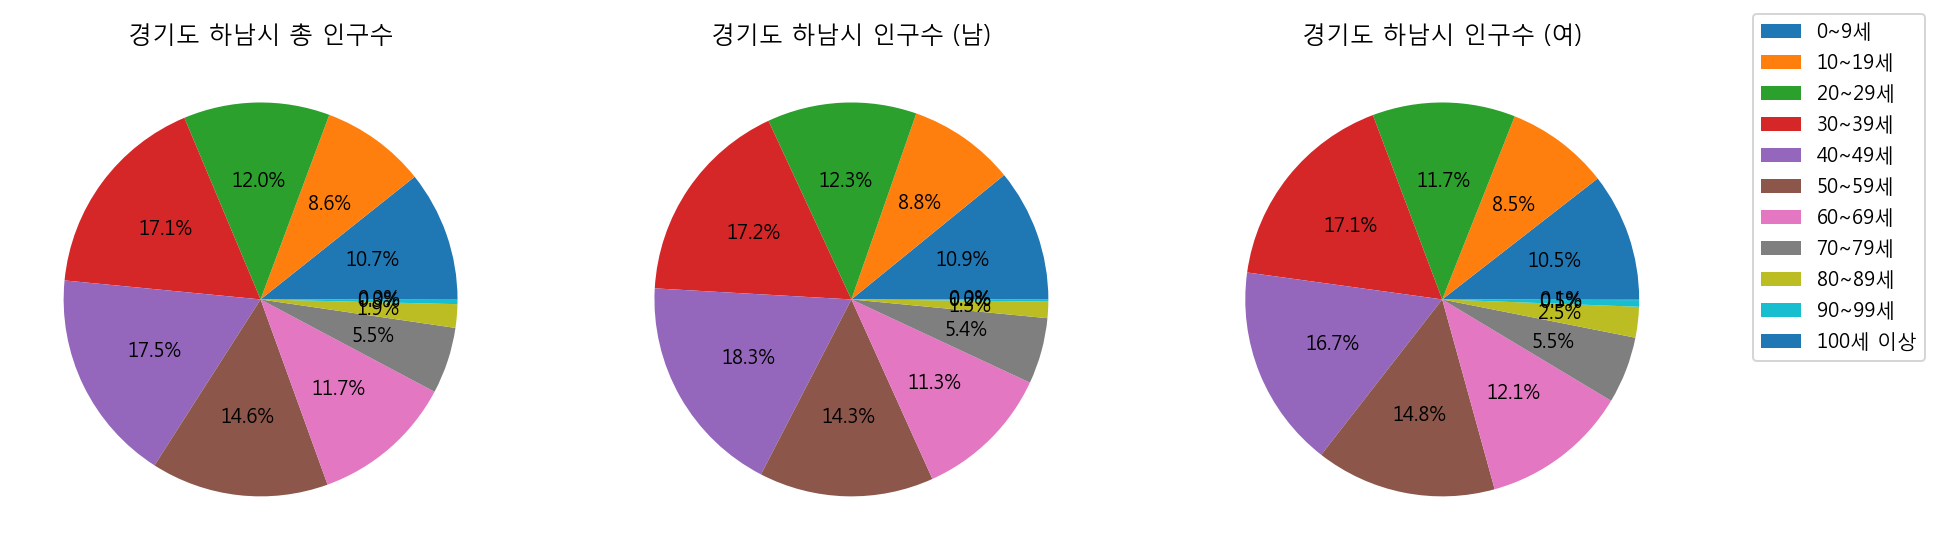

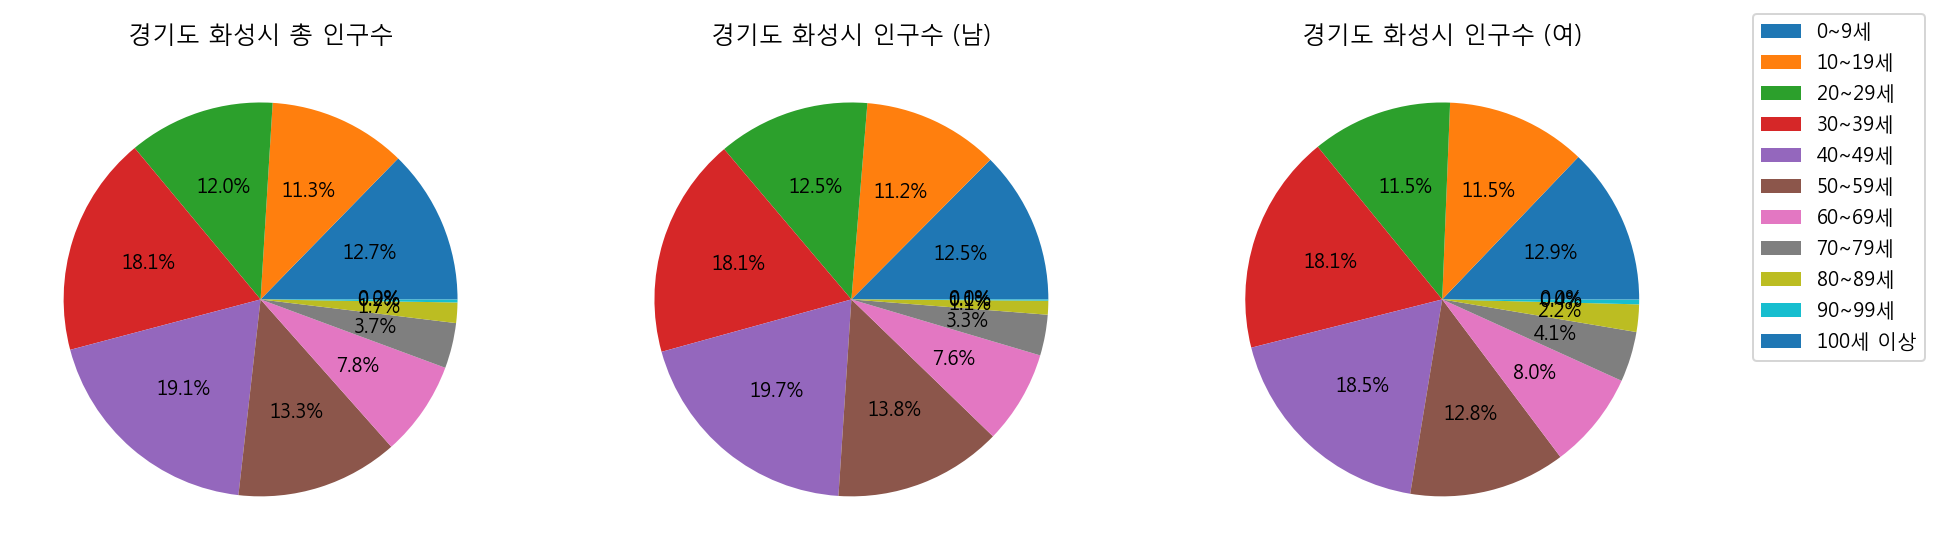

In [24]:
for i in range(21,31):    
    fig, axs = plt.subplots(figsize=(15,5),nrows=1,ncols=3)
    for x in range(3):
        axs[x].pie(df2.iloc[i,4+(x*12):15+(x*12)],autopct='%1.1f%%')
        axs[x].set_title(df2.index[i]+back_text[x])
    plt.legend(df2.columns[4:15],bbox_to_anchor=(1.5,1.1))
    plt.show

In [19]:
df2.iloc[0,4:15]
df2.iloc[0,16:27]
df2.iloc[0,28:39]

0~9세 (여)       1784
10~19세 (여)     2247
20~29세 (여)     2673
30~39세 (여)     2732
40~49세 (여)     3695
50~59세 (여)     5389
60~69세 (여)     5656
70~79세 (여)     3610
80~89세 (여)     2203
90~99세 (여)      374
100세 이상 (여)      28
Name: 경기도 가평군 , dtype: object